## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

pd.set_option('float_format', '{:.2f}'.format)

In [102]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")

#1. Проводимо Exploratory Data Analysis і висуваємо гіпотези щодо впливу окремих ознак на цільову ознаку y.


Глянемо на сет даних

In [103]:
df.head(20)

age          job   marital            education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0    56    housemaid   married             basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
1    57     services   married          high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
2    37     services   married          high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
3    40       admin.   married             basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
4    56     services   married          high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
5    45     services   married             basic.9y  unknown      no   no  telephone   may         mon       198         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
6    59       admin.   married  professional.course       no      no   no  telephone   may         mon       139         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
7    41  blue-collar   married              unknown  unknown      no   no  telephone   may         mon       217         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
8    24   technician    single  professional.course       no     yes   no  telephone   may         mon       380         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
9    25     services    single          high.school       no     yes   no  telephone   may         mon        50         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
10   41  blue-collar   married              unknown  unknown      no   no  telephone   may         mon        55         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
11   25     services    single          high.school       no     yes   no  telephone   may         mon       222         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
12   29  blue-collar    single          high.school       no      no  yes  telephone   may         mon       137         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
13   57    housemaid  divorced             basic.4y       no     yes   no  telephone   may         mon       293         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
14   35  blue-collar   married             basic.6y       no     yes   no  telephone   may         mon       146         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
15   54      retired   married             basic.9y  unknown     yes  yes  telephone   may         mon       174         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
16   35  blue-collar   married             basic.6y       no     yes   no  telephone   may         mon       312         1    999         0  nonexistent          

In [104]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [105]:
df.describe()

age  duration  campaign    pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
count 41188.00  41188.00  41188.00 41188.00  41188.00      41188.00        41188.00       41188.00   41188.00     41188.00
mean     40.02    258.29      2.57   962.48      0.17          0.08           93.58         -40.50       3.62      5167.04
std      10.42    259.28      2.77   186.91      0.49          1.57            0.58           4.63       1.73        72.25
min      17.00      0.00      1.00     0.00      0.00         -3.40           92.20         -50.80       0.63      4963.60
25%      32.00    102.00      1.00   999.00      0.00         -1.80           93.08         -42.70       1.34      5099.10
50%      38.00    180.00      2.00   999.00      0.00          1.10           93.75         -41.80       4.86      5191.00
75%      47.00    319.00      3.00   999.00      0.00          1.40           93.99         -36.40       4.96      5228.10
max      98.00   4918.00     56.00   999.00      7.00          1.40           94.77         -26.90       5.04      5228.10

## Категоріальні змінні

In [106]:
df.select_dtypes(include=['object']).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [107]:
# Перевіримо результат
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


In [108]:
len(df.select_dtypes(include = "object").columns)

11

In [109]:
len(df.select_dtypes(include="number").columns)

10

In [110]:
df.isnull().values.sum()

np.int64(0)

In [111]:
df['y'].value_counts(normalize = True) * 100

y
no    88.73
yes   11.27
Name: proportion, dtype: float64

**Аналіз категоріальних даних:**
* Одновимірний: порівняння окремих категоріальних ознак із цільовою змінною (наприклад, як різні значення впливають на результат).
* Двовимірний: порівняння між двома категоріальними ознаками (наприклад, як вони взаємопов’язані).
Для наочності використовуються гістограми.

In [112]:
def bi_cat_countplot(df, column, hue_column):
    plt.style.use("seaborn-v0_8-whitegrid")
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

    # ===== 1-й графік: нормалізований розподіл (%) =====
    pltname = f'Normalized distribution of values by category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(2)

    colors = ["#4B9CD3", "#F48FB1", "#9B59B6"]  # синій + рожевий
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=axes[0], title=pltname, color=colors, edgecolor="black")

    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%', fontsize=10, label_type="edge")

    ax.set_ylabel("Відсоток (%)", fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.set_title(pltname, fontsize=14, pad=15)
    ax.legend(title=hue_column, fontsize=10, title_fontsize=11)
    axes[0].tick_params(axis="x", rotation=45)

    # ===== 2-й графік: абсолютні значення =====
    pltname = f'Number of data points by category: {column}'
    counts = df.groupby(hue_column)[column].value_counts()

    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=axes[1], title=pltname, color=colors, edgecolor="black")

    for container in ax.containers:
        ax.bar_label(container, fontsize=10, label_type="edge")

    ax.set_ylabel("Кількість", fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.set_title(pltname, fontsize=14, pad=15)
    ax.legend(title=hue_column, fontsize=10, title_fontsize=11)
    axes[1].tick_params(axis="x", rotation=45)

    plt.tight_layout()

def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='y')

def bi_countplot_target(df1, column, hue_column):
    bi_cat_countplot(df1, column, hue_column)
    plt.show()

In [113]:
def one_cat_countplot(df, column, hue_column):
    plt.style.use("seaborn-v0_8-whitegrid")  # стиль графіка
    fig, ax = plt.subplots(figsize=(15, 12))

    pltname = 'Normalized distribution of values'

    # Унікальні значення для hue
    unique_hue_values = df[hue_column].unique()

    # Розрахунок пропорцій (%)
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions * 100).round(2)

    # Побудова бар-чарту з кастомними кольорами
    colors = ["#4B9CD3", "#F48FB1"]  # синій + рожевий
    proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=ax, title=pltname, color=colors, edgecolor="black")

    # Додавання відсотків на стовпці
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%', fontsize=11, label_type="edge")

    # Оформлення
    ax.set_ylabel("Відсоток (%)", fontsize=14)
    ax.set_xlabel(column, fontsize=14)
    ax.set_title(pltname, fontsize=18, pad=20)
    ax.legend(title=hue_column, fontsize=12, title_fontsize=13)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

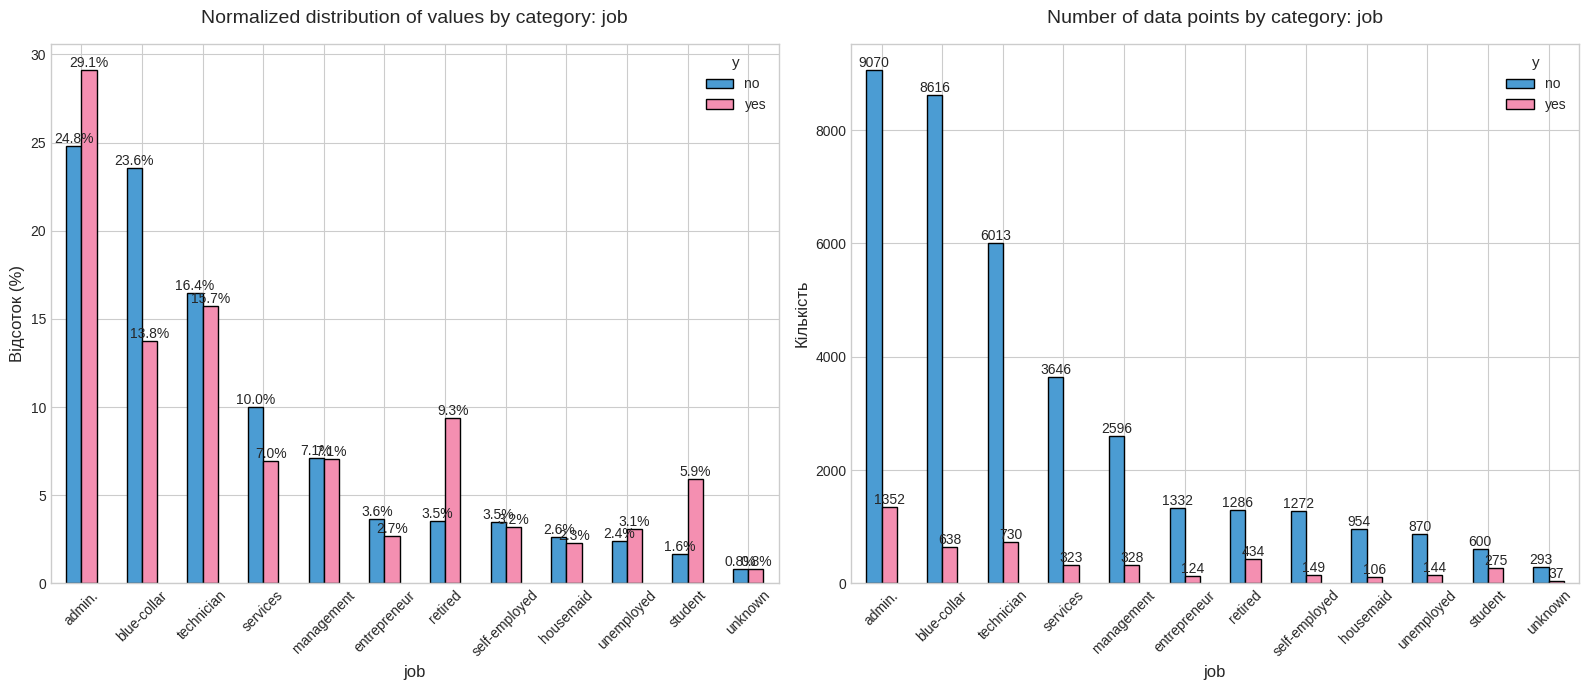

In [114]:
uni_cat_target_compare(df, 'job')

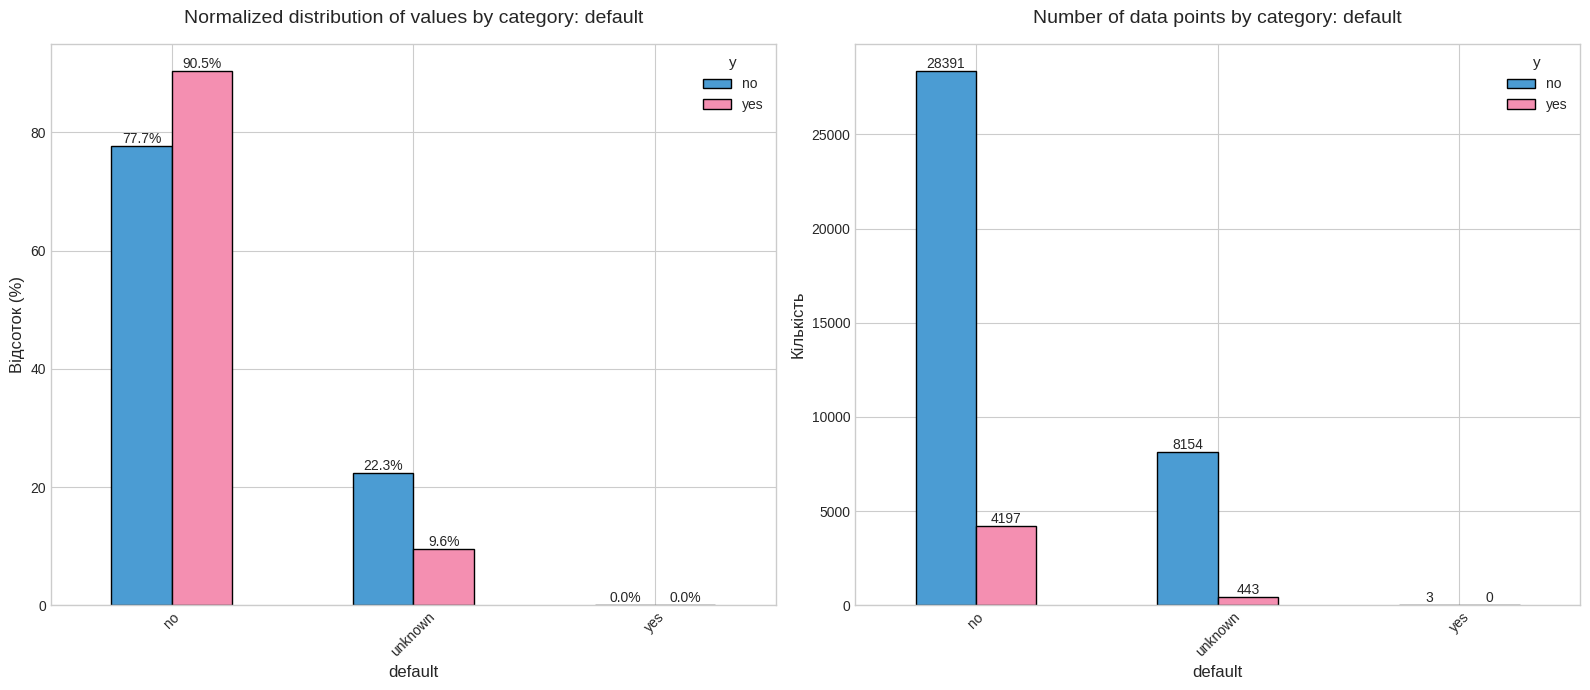

In [115]:
uni_cat_target_compare(df, 'default')

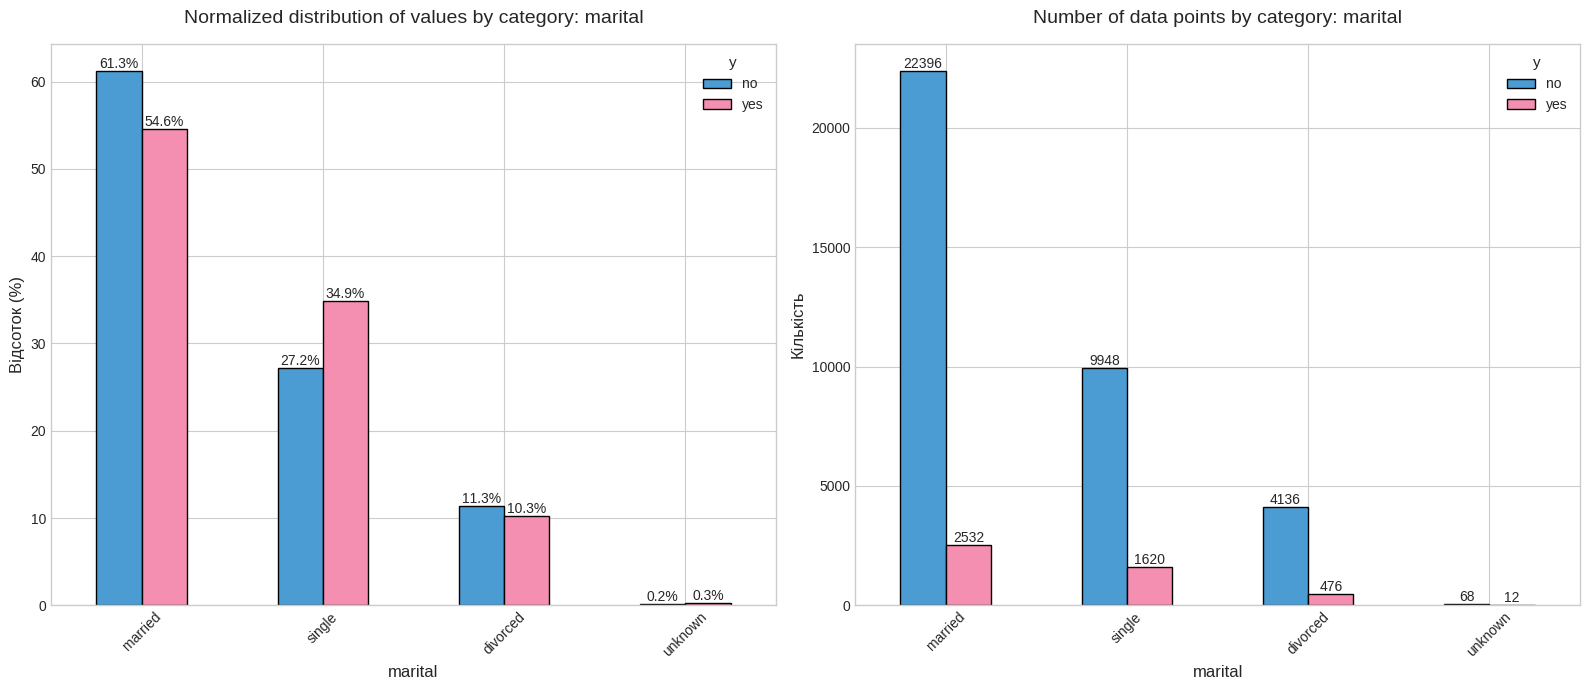

In [116]:
uni_cat_target_compare(df, 'marital')

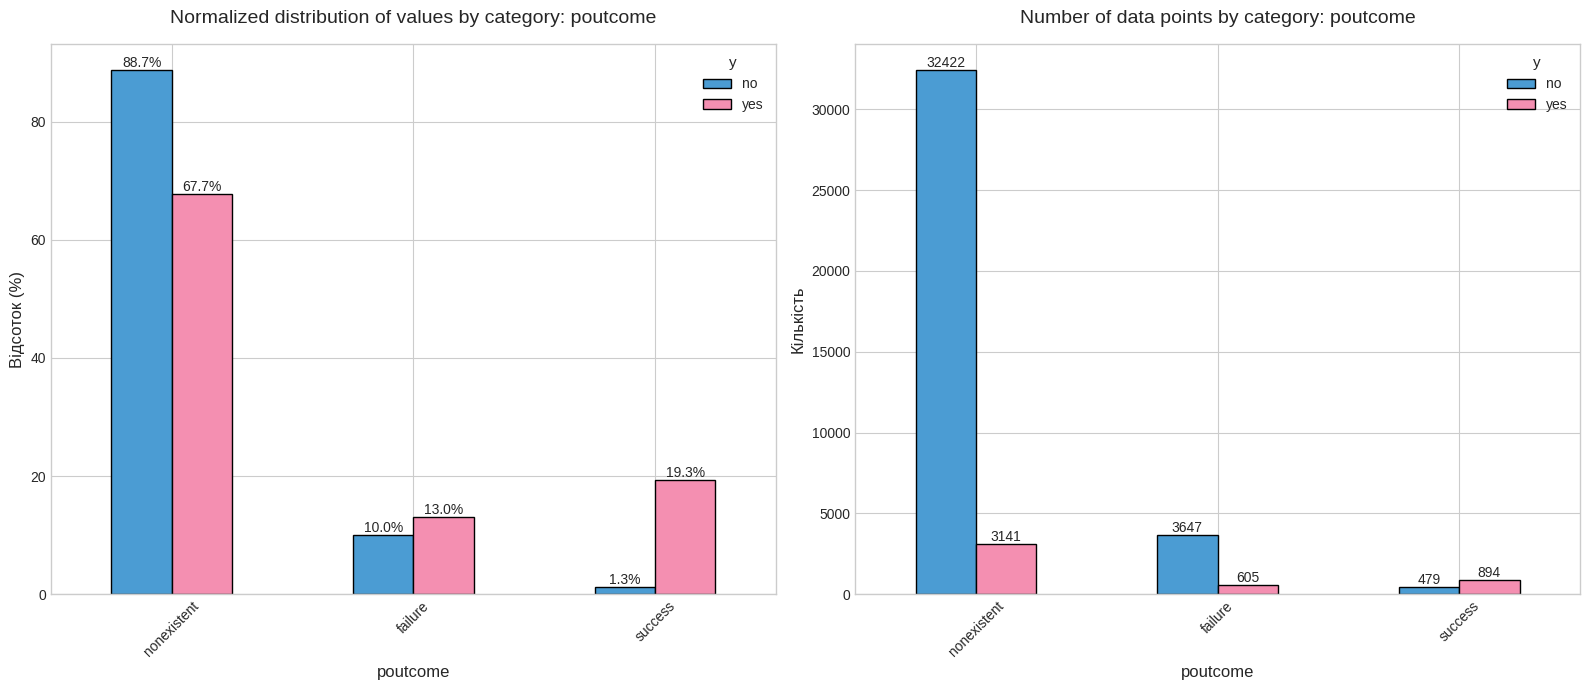

In [117]:
uni_cat_target_compare(df, 'poutcome')

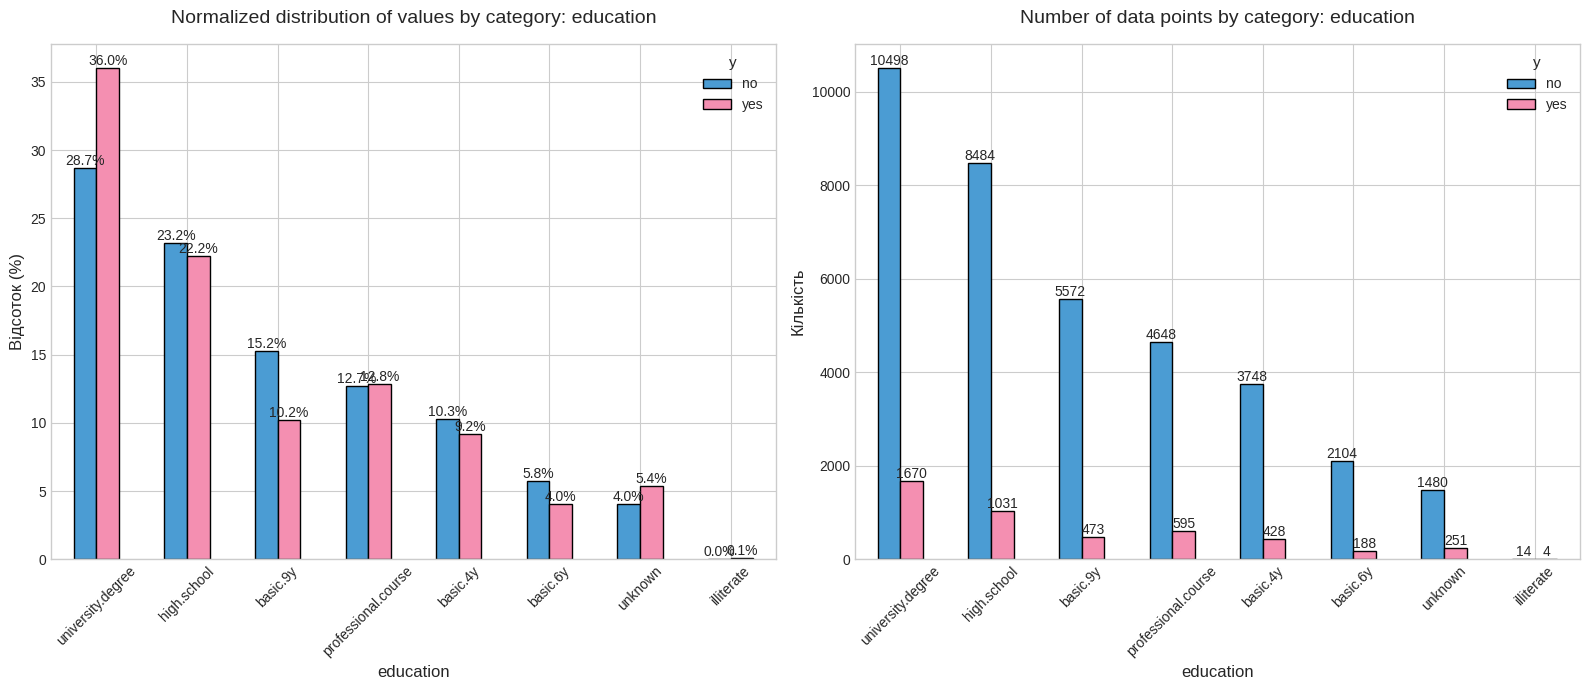

In [118]:
uni_cat_target_compare(df, 'education')

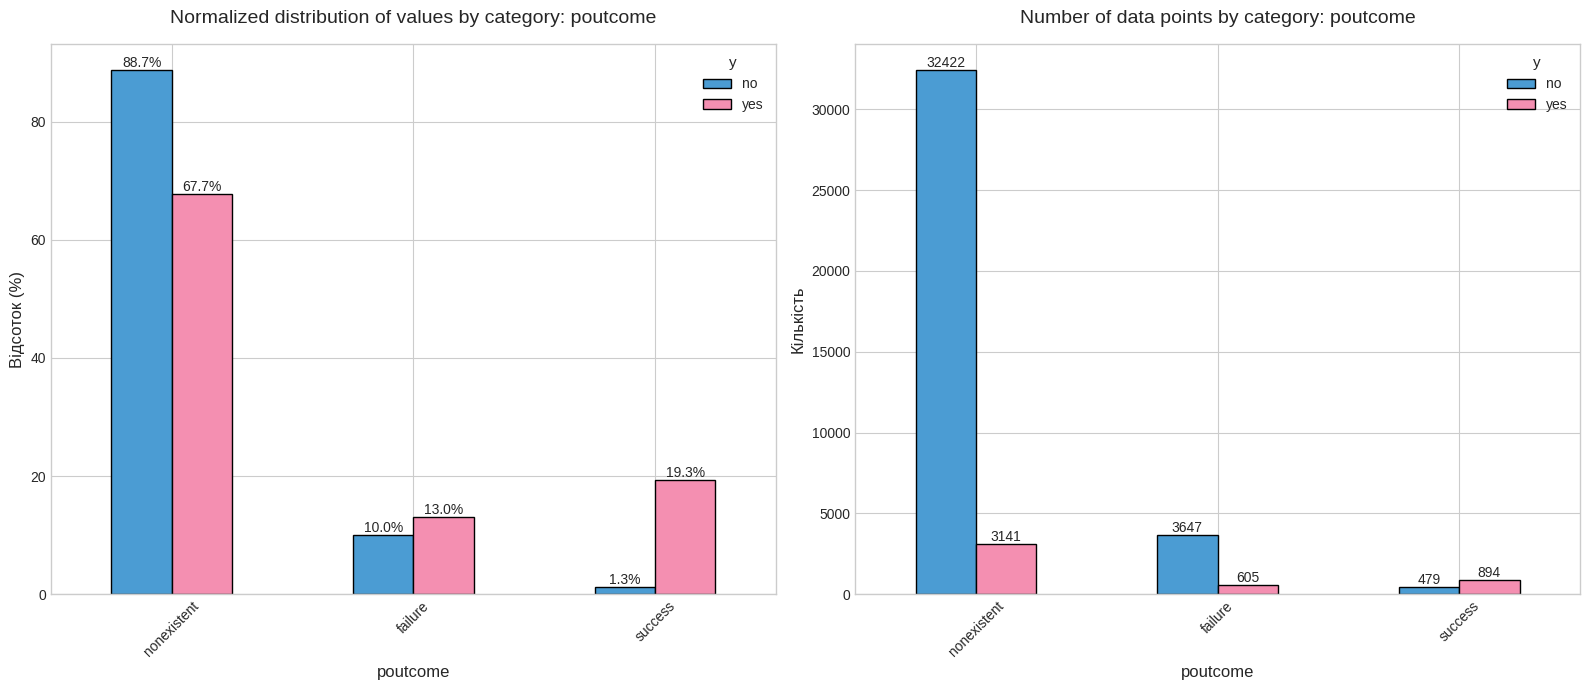

In [119]:
uni_cat_target_compare(df, 'poutcome')

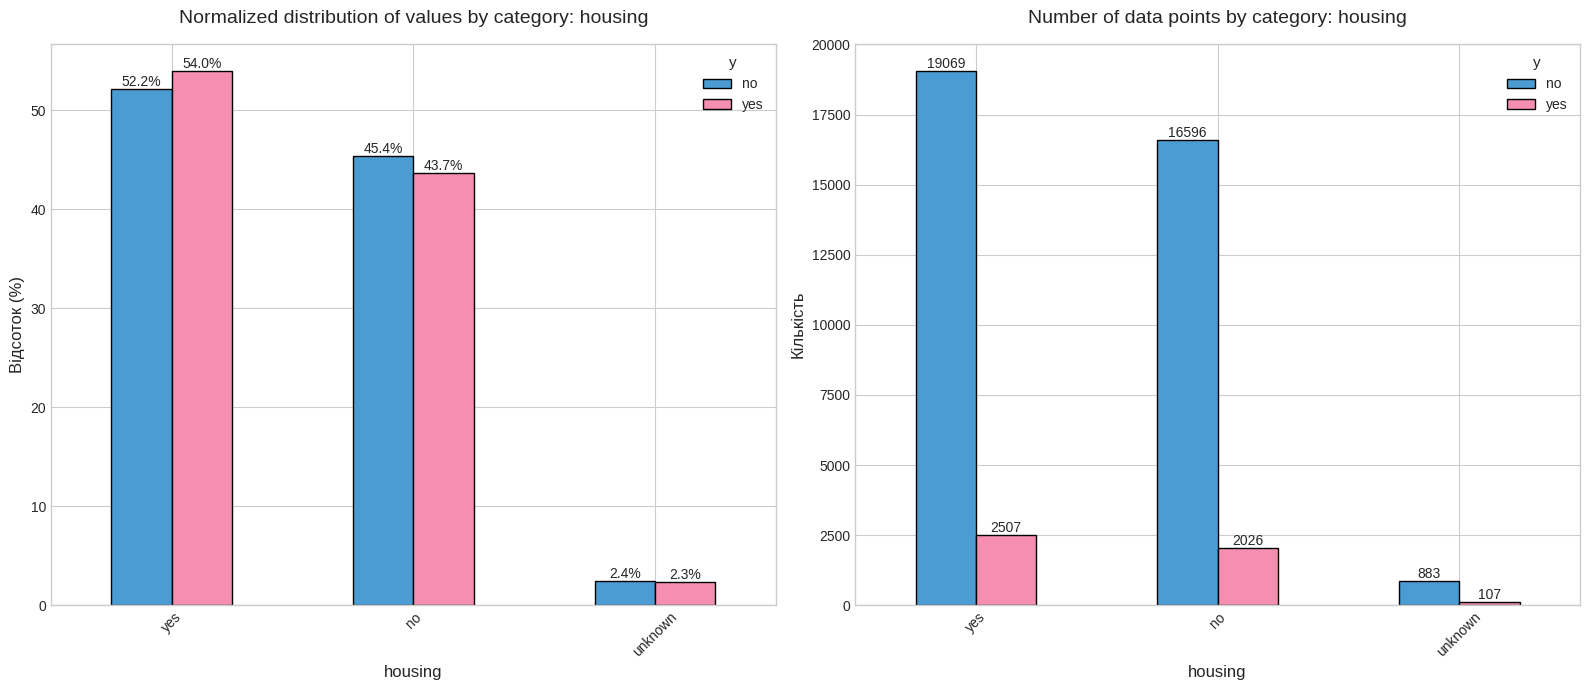

In [120]:
uni_cat_target_compare(df, 'housing')

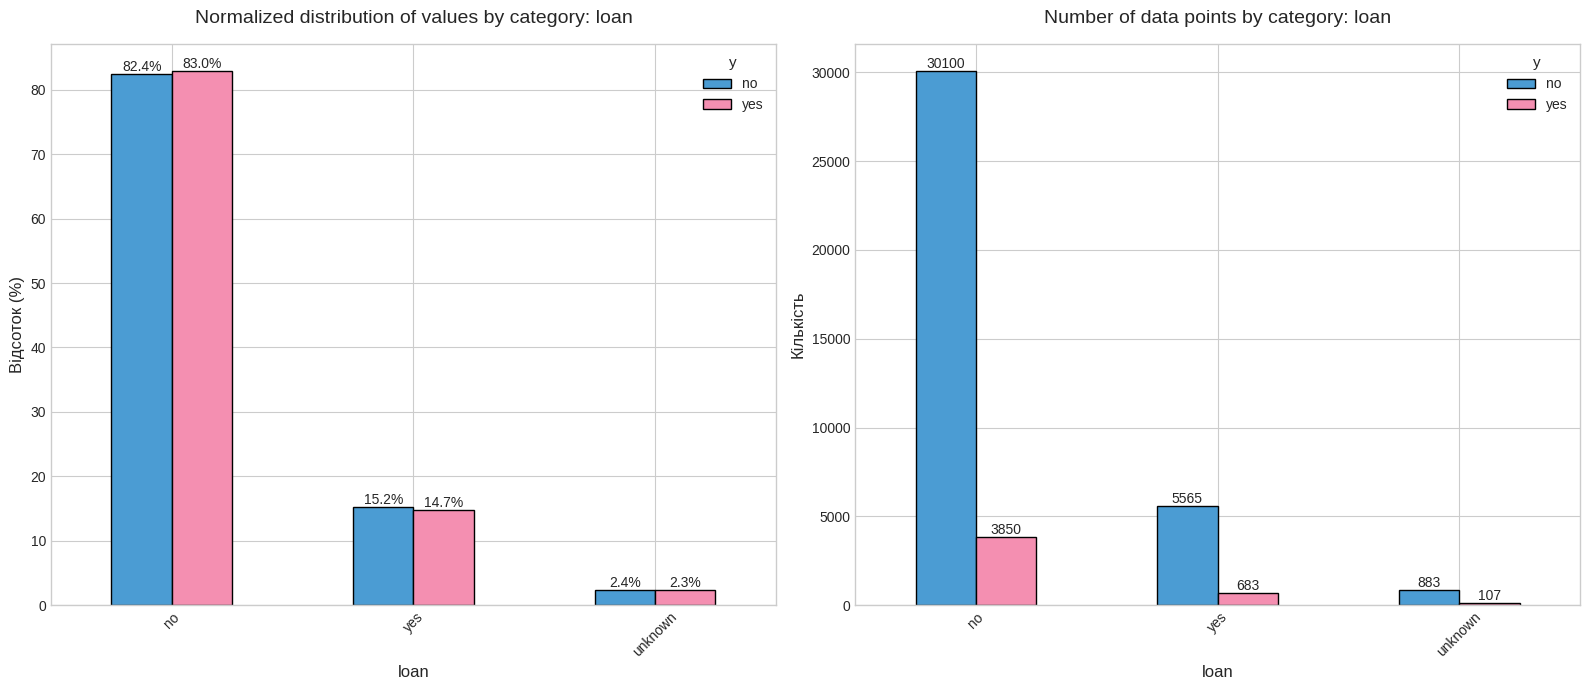

In [121]:
uni_cat_target_compare(df, 'loan')

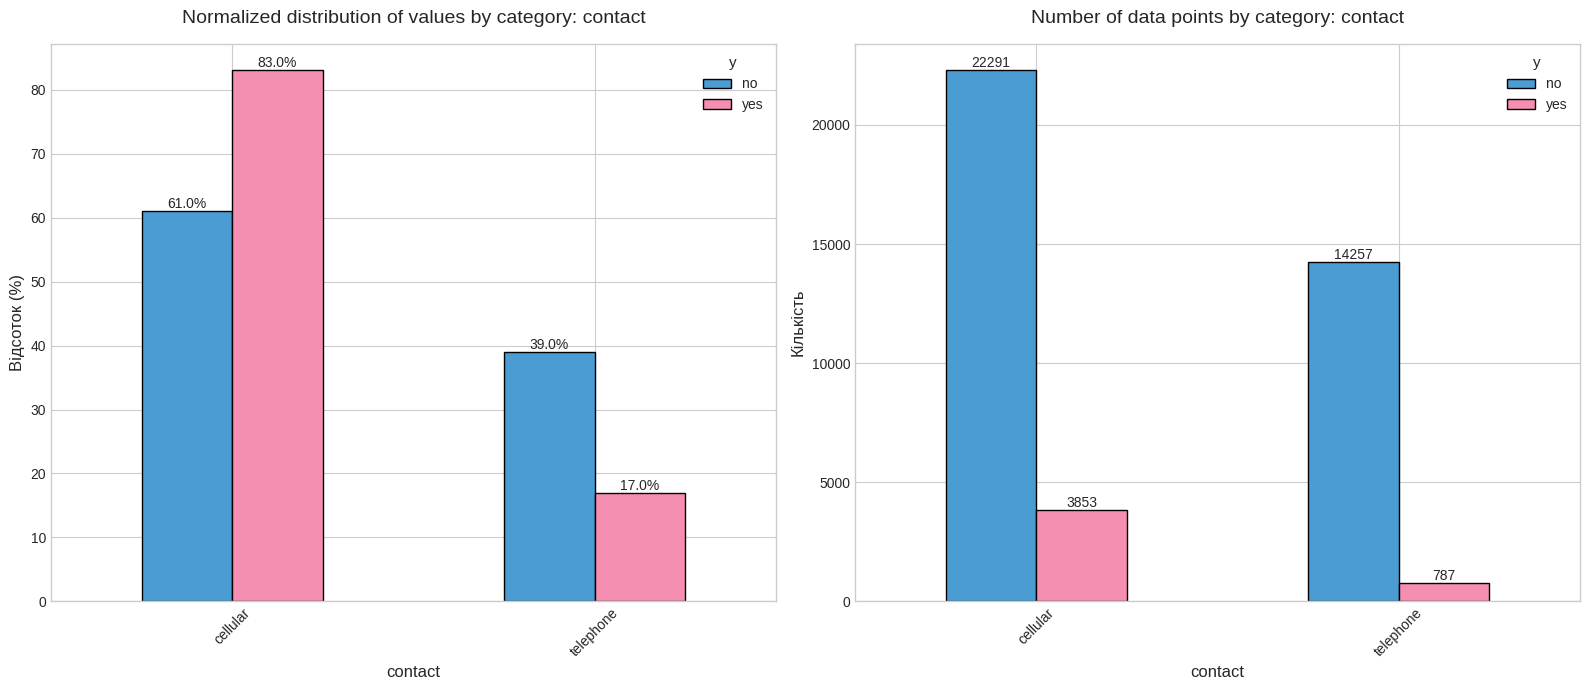

In [122]:
uni_cat_target_compare(df, 'contact')

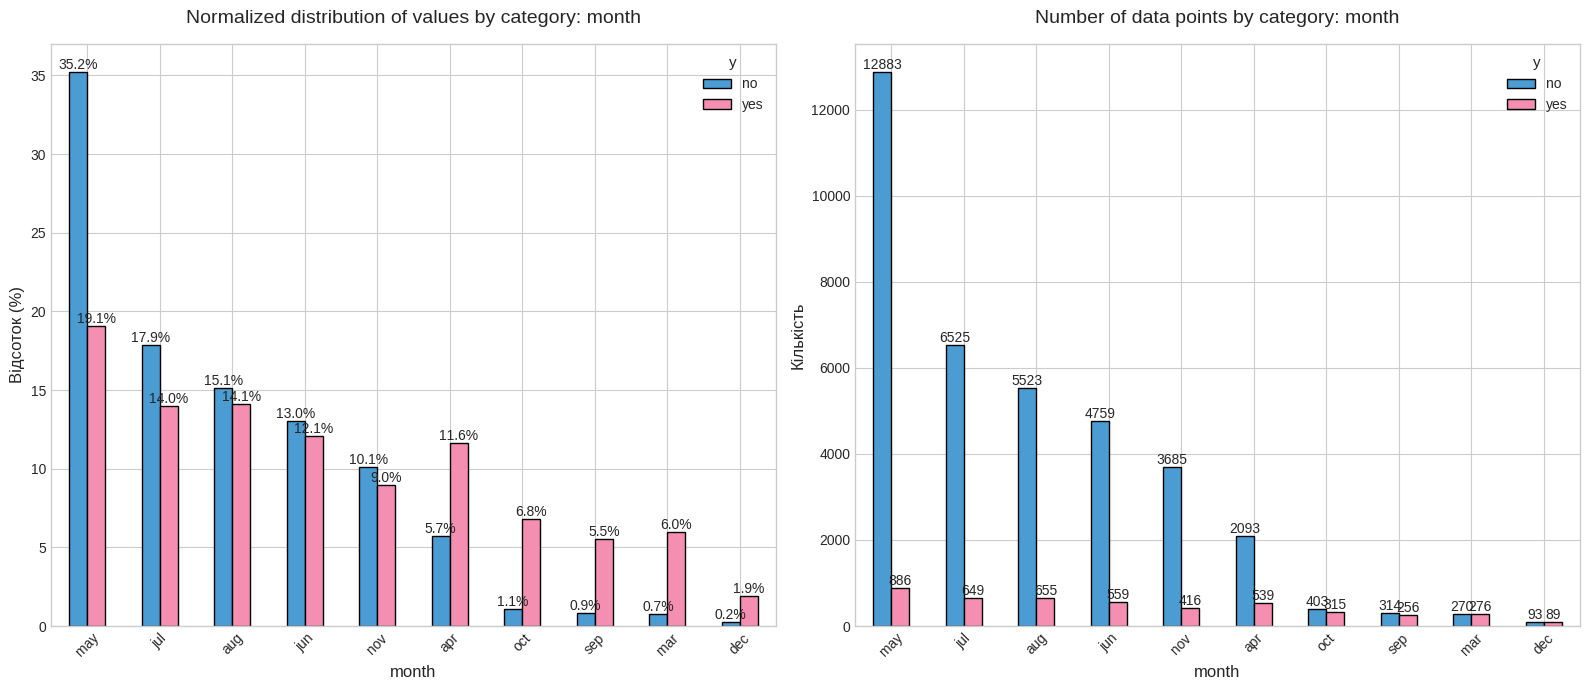

In [123]:
uni_cat_target_compare(df, 'month')

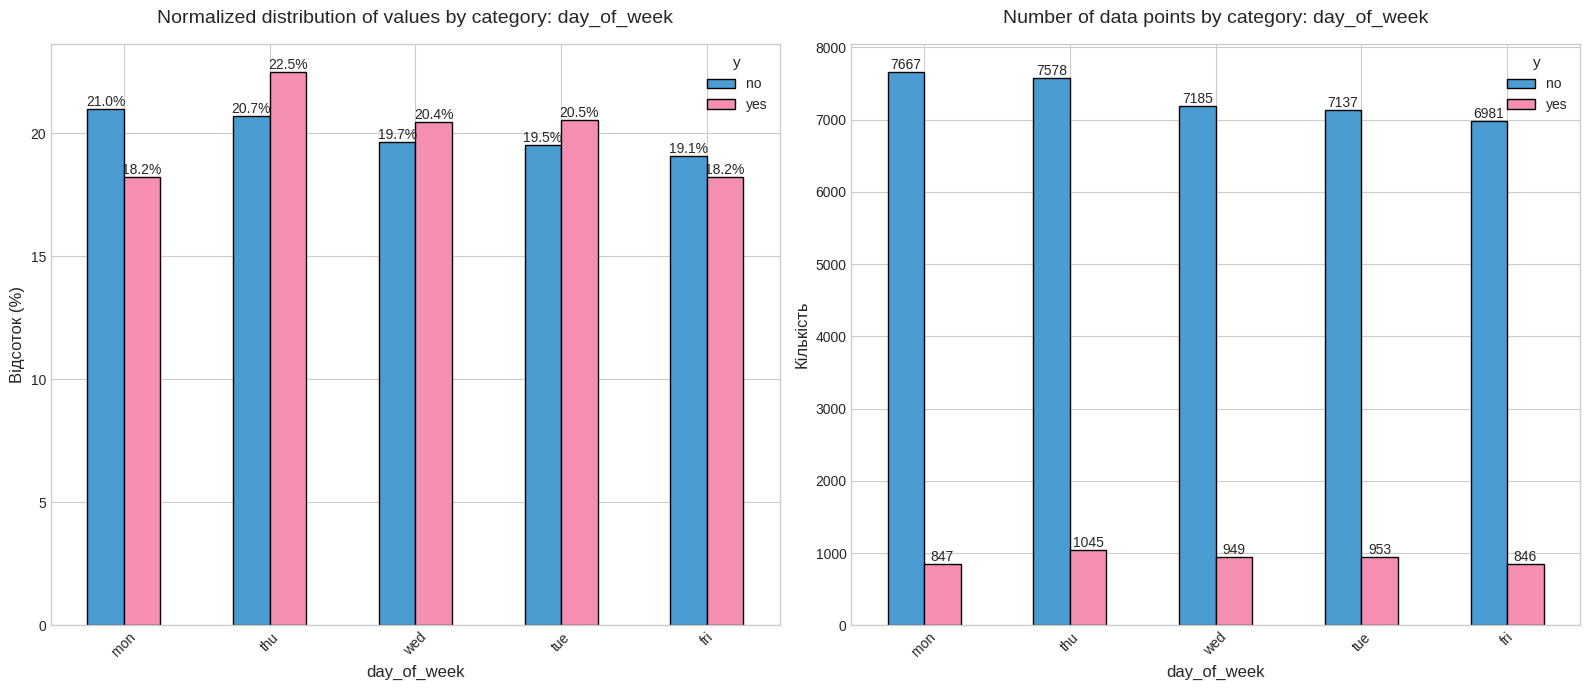

In [124]:
uni_cat_target_compare(df, 'day_of_week')

Спостереження:

In [125]:
# Опції для відображення "на повний екран"
pd.set_option('display.max_colwidth', None)   # не обрізати довгі тексти
pd.set_option('display.expand_frame_repr', False)  # не переносити на новий рядок
pd.set_option('display.max_rows', None)   # показати всі рядки
pd.set_option('display.max_columns', None)  # показати всі стовпці
pd.set_option('display.width', 2000)  # ширина таблиці

# Дані для опису категорій
data = {
    "Категорія": [
        "poutcome", "education", "job", "marital",
        "default", "housing", "loan", "contact",
        "month", "day_of_week"
    ],
    "Спостереження": [
        "Клієнти з успіхом у попередній кампанії частіше підписують депозит.",
        "Клієнти з університетським ступенем мають вищу ймовірність підписати депозит.",
        "Admin, пенсіонери та студенти частіше підписують депозит, фізична праця – рідше.",
        "Одинокі клієнти частіше підписують депозит, ніж одружені чи розлучені.",
        "Клієнти без дефолту мають трохи вищу ймовірність підписати депозит.",
        "Клієнти з житловим кредитом трохи частіше підписують депозит.",
        "Різниця між клієнтами з персональним кредитом і без нього майже відсутня.",
        "Клієнти, з якими зв’язувались через мобільний, частіше підписують депозит.",
        "Травень і липень – найгірші місяці для продажів, найбільше відмов.",
        "Понеділок і п’ятниця – найгірші дні для продажів, найбільше відмов."
    ]
}

# Створення окремого DataFrame для підсумків (щоб не перезаписати df з даними)
df_summary = pd.DataFrame(data)

# Вивід
df_summary

Категорія                                                                     Спостереження
0     poutcome               Клієнти з успіхом у попередній кампанії частіше підписують депозит.
1    education     Клієнти з університетським ступенем мають вищу ймовірність підписати депозит.
2          job  Admin, пенсіонери та студенти частіше підписують депозит, фізична праця – рідше.
3      marital            Одинокі клієнти частіше підписують депозит, ніж одружені чи розлучені.
4      default               Клієнти без дефолту мають трохи вищу ймовірність підписати депозит.
5      housing                     Клієнти з житловим кредитом трохи частіше підписують депозит.
6         loan         Різниця між клієнтами з персональним кредитом і без нього майже відсутня.
7      contact        Клієнти, з якими зв’язувались через мобільний, частіше підписують депозит.
8        month                Травень і липень – найгірші місяці для продажів, найбільше відмов.
9  day_of_week               Понеділок і п’ятниця – найгірші дні для продажів, найбільше відмов.

Розподіл двовимірних категоріальних значень

In [126]:
df.head()

age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0   56  housemaid  married     basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
1   57   services  married  high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
2   37   services  married  high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
3   40     admin.  married     basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no
4   56   services  married  high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent          1.10           93.99         -36.40       4.86      5191.00  no

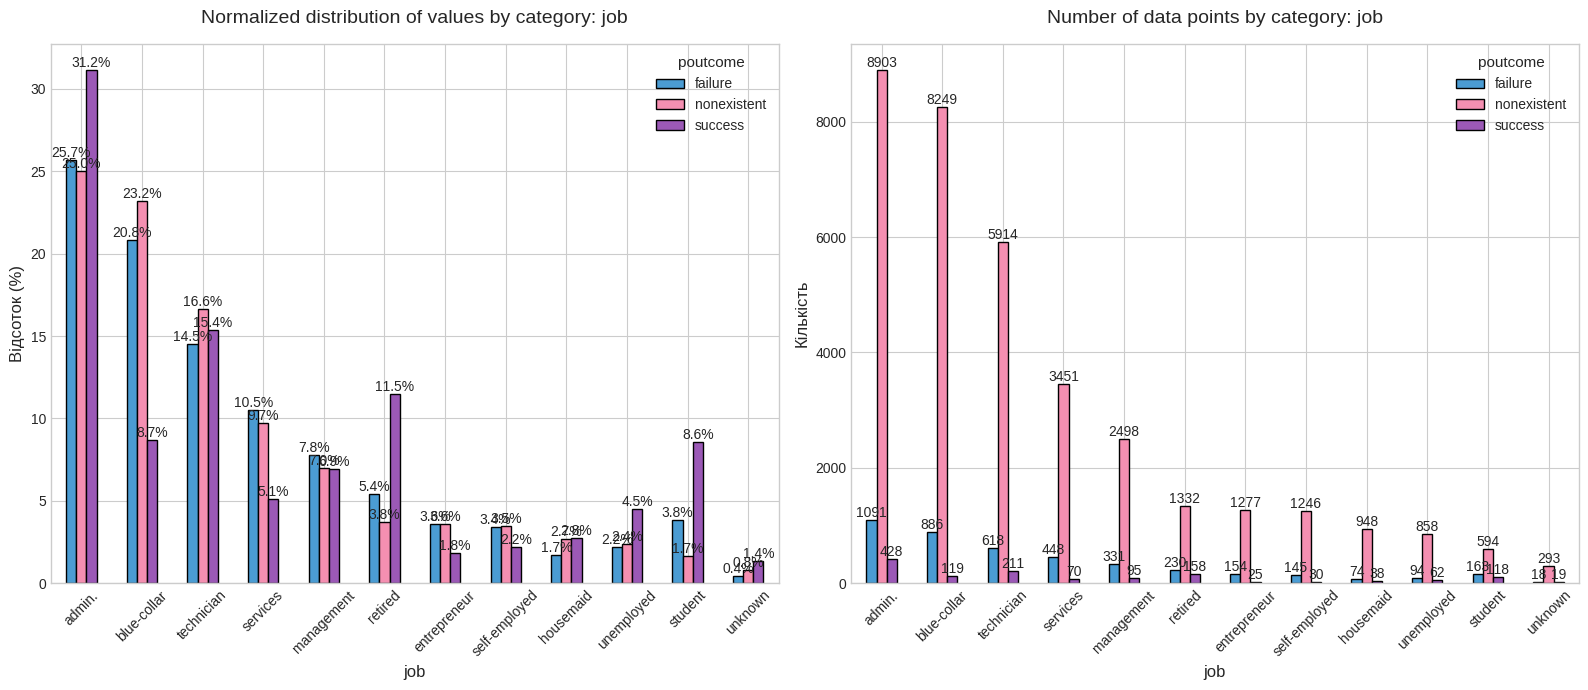

In [127]:
bi_countplot_target(df, 'job', 'poutcome')

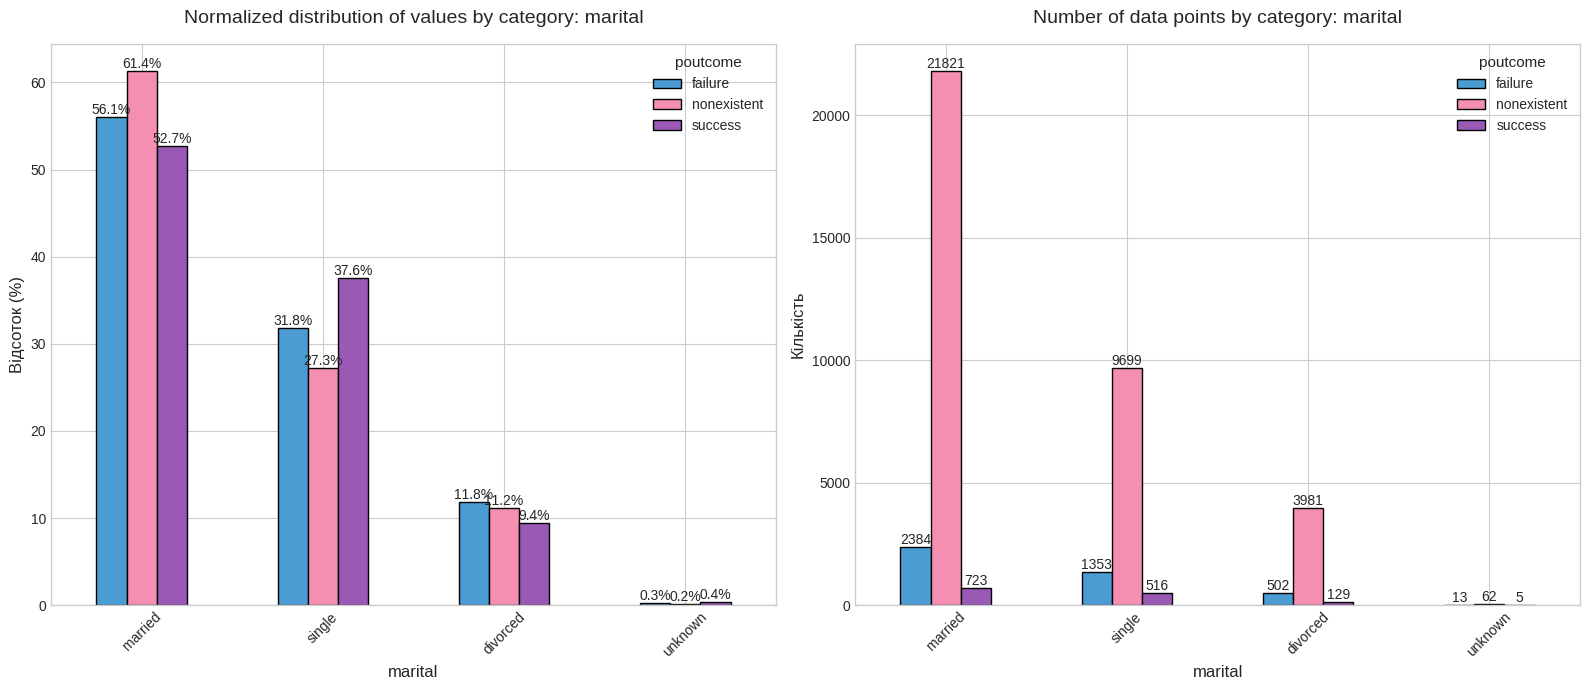

In [128]:
bi_countplot_target(df, 'marital', 'poutcome')

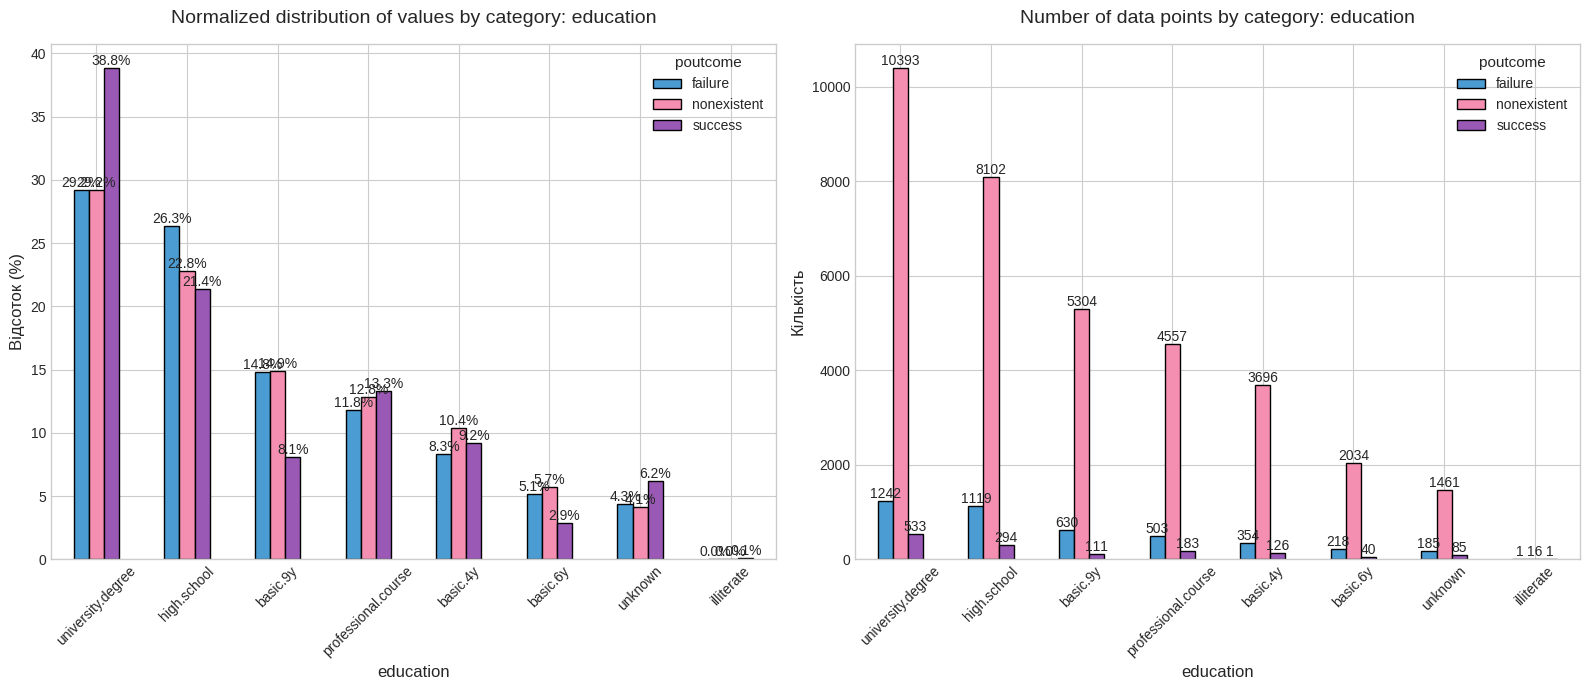

In [129]:
bi_countplot_target(df, 'education', 'poutcome')

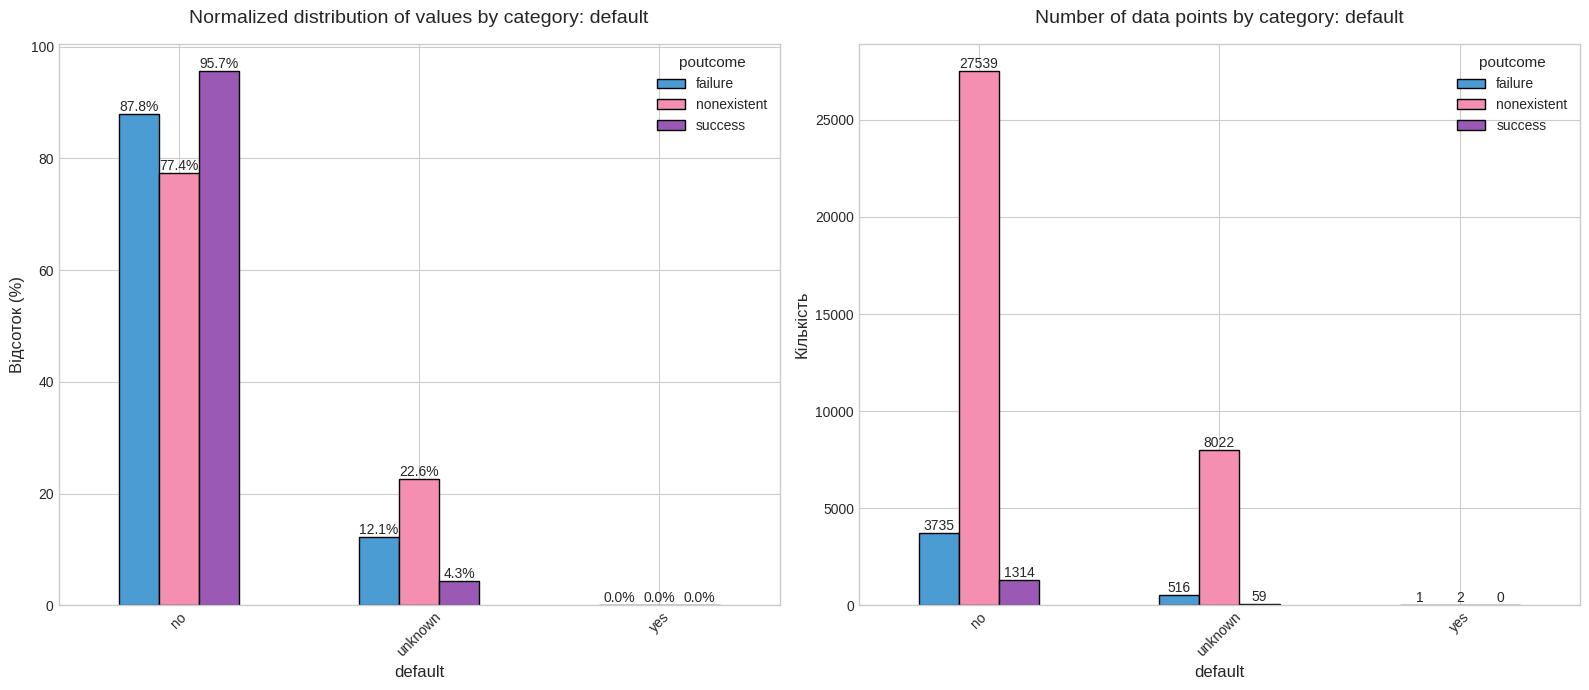

In [130]:
bi_countplot_target(df, 'default', 'poutcome')

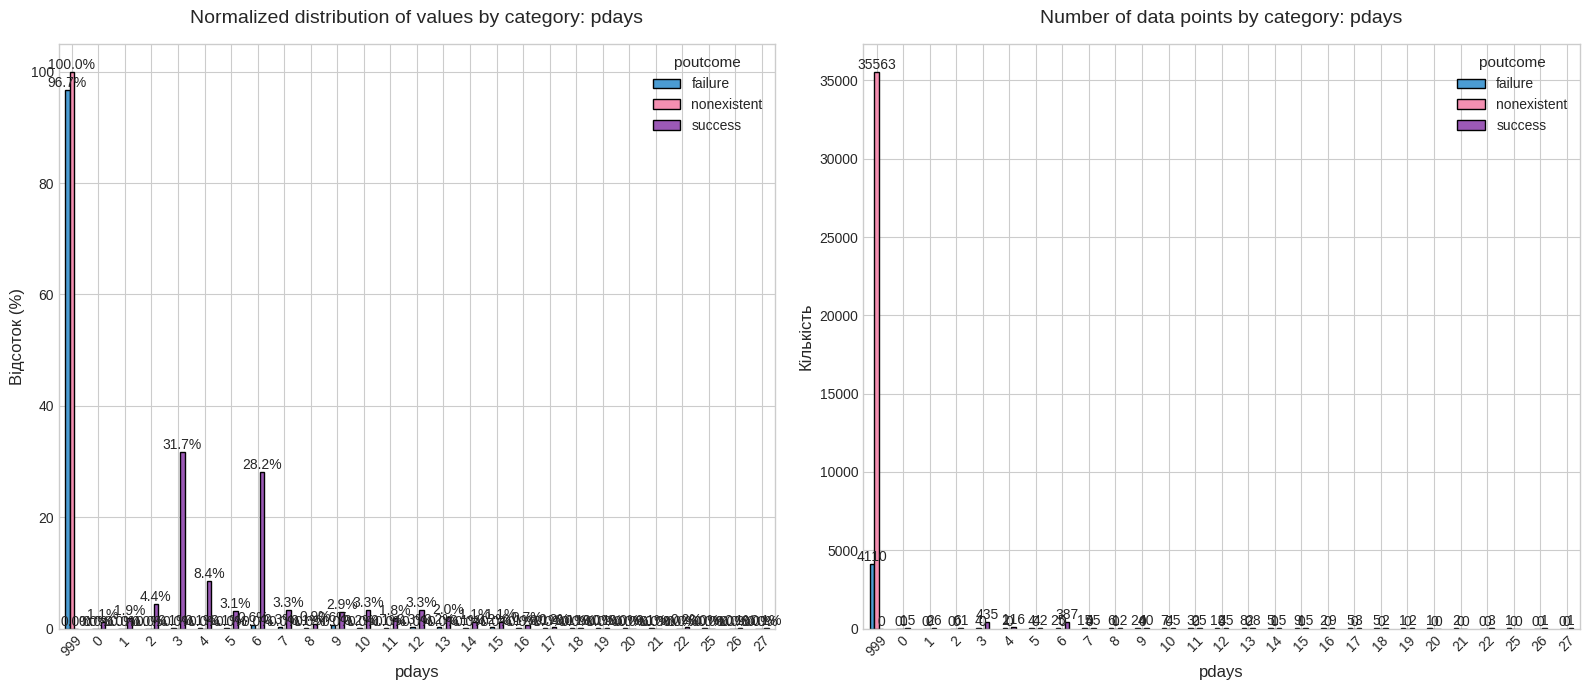

In [131]:
bi_countplot_target(df, 'pdays', 'poutcome')

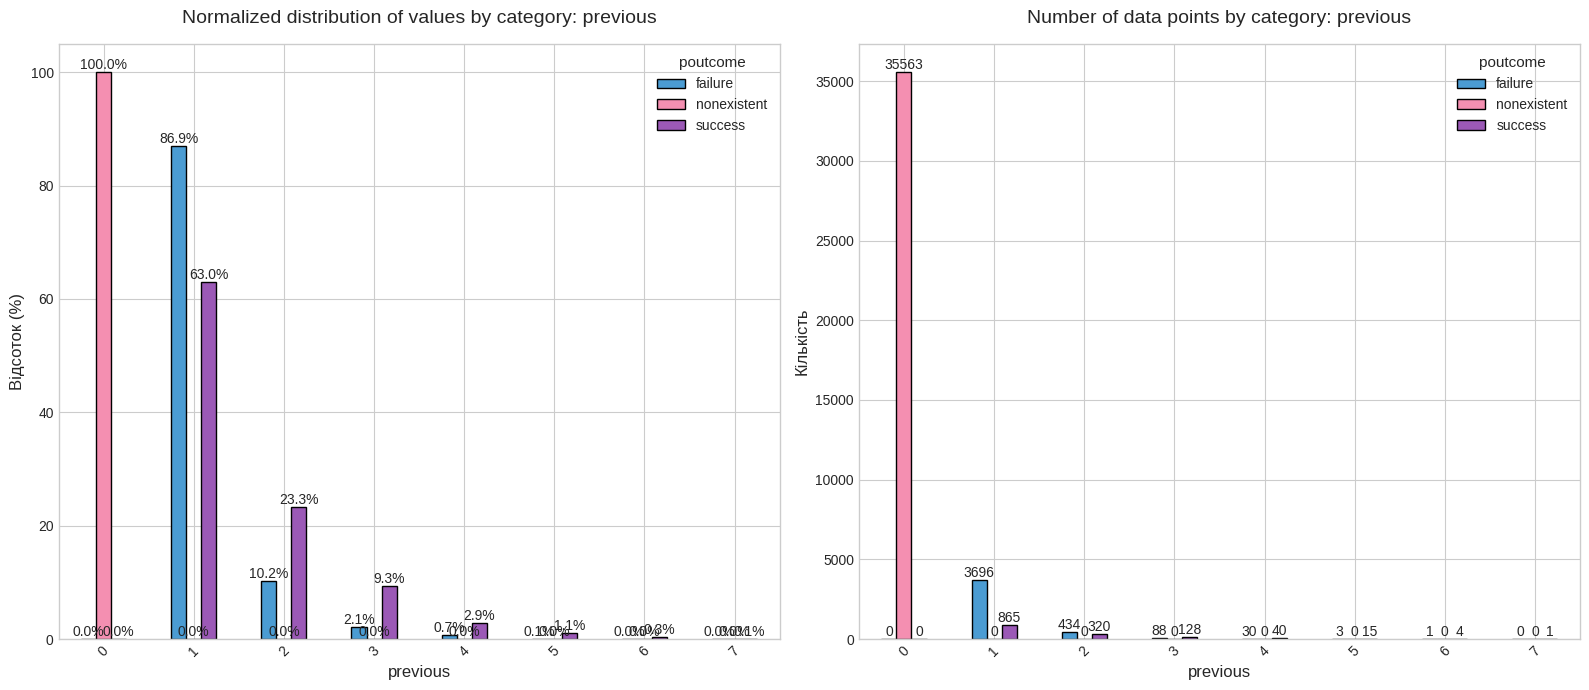

In [132]:
bi_countplot_target(df, 'previous', 'poutcome')

In [133]:
# Опції для відображення "на повний екран"
pd.set_option('display.max_colwidth', None)   # не обрізати довгі тексти
pd.set_option('display.expand_frame_repr', False)  # не переносити на новий рядок
pd.set_option('display.max_rows', None)   # показати всі рядки
pd.set_option('display.max_columns', None)  # показати всі стовпці
pd.set_option('display.width', 2000)  # ширина таблиці

# Дані для висновків (bivariate categorical analysis)
data_bi = {
    "Категорія": [
        "poutcome",
        "pdays",
        "previous",
        "target"
    ],
    "Висновки": [
        "Пенсіонери, студенти, безробітні, клієнти з адміністративною роботою, без кредитів та неодружені частіше мали успіх у попередній маркетинговій кампанії.",
        "Клієнти, з якими зв’язувались  до 6 днів тому, частіше мали успіх у попередній кампанії.",
        "Якщо клієнта контактували 2–4 рази у попередніх кампаніях, імовірність його успіху в поточній кампанії є вищою.",
        "Цільова змінна розподілена нерівномірно (більше відмов 'no')."
    ]
}

# Створення окремого DataFrame для підсумків (щоб не перезаписати df з даними)
df_bi_summary = pd.DataFrame(data_bi)

# Вивід
df_bi_summary

Категорія                                                                                                                                                  Висновки
0  poutcome  Пенсіонери, студенти, безробітні, клієнти з адміністративною роботою, без кредитів та неодружені частіше мали успіх у попередній маркетинговій кампанії.
1     pdays                                                                  Клієнти, з якими зв’язувались  до 6 днів тому, частіше мали успіх у попередній кампанії.
2  previous                                           Якщо клієнта контактували 2–4 рази у попередніх кампаніях, імовірність його успіху в поточній кампанії є вищою.
3    target                                                                                             Цільова змінна розподілена нерівномірно (більше відмов 'no').

### Настпуні кроки: змінну y перетворюємо "у" числовий формат для подальшого аналізу та для всіх числових стовпців розраховуємо діапазон відхилень (мінімальні та максимальні значення).


In [134]:
# Перевіримо унікальні значення перед конвертацією
print(df['y'].unique())

['no' 'yes']


In [135]:
# Приводимо до нижнього регістру і видаляємо пробіли
# df['y'] = df['y'].str.strip().str.lower()

# Конвертуємо у 0/1
# df['y'] = np.where(df['y'] == 'yes', 1, 0)

# Перевіримо результат
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


In [136]:
for col in ['y']:
  df[col] = np.where(df[col]=='yes', 1, 0)

In [137]:
print(df['y'].value_counts())

y
0    36548
1     4640
Name: count, dtype: int64


# Числові змінні
Глянемо викиди у числових стовпцях.


In [138]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [139]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Distribution plot for ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Box plot for ' + column
      plt.title(pltname)

      plt.show()

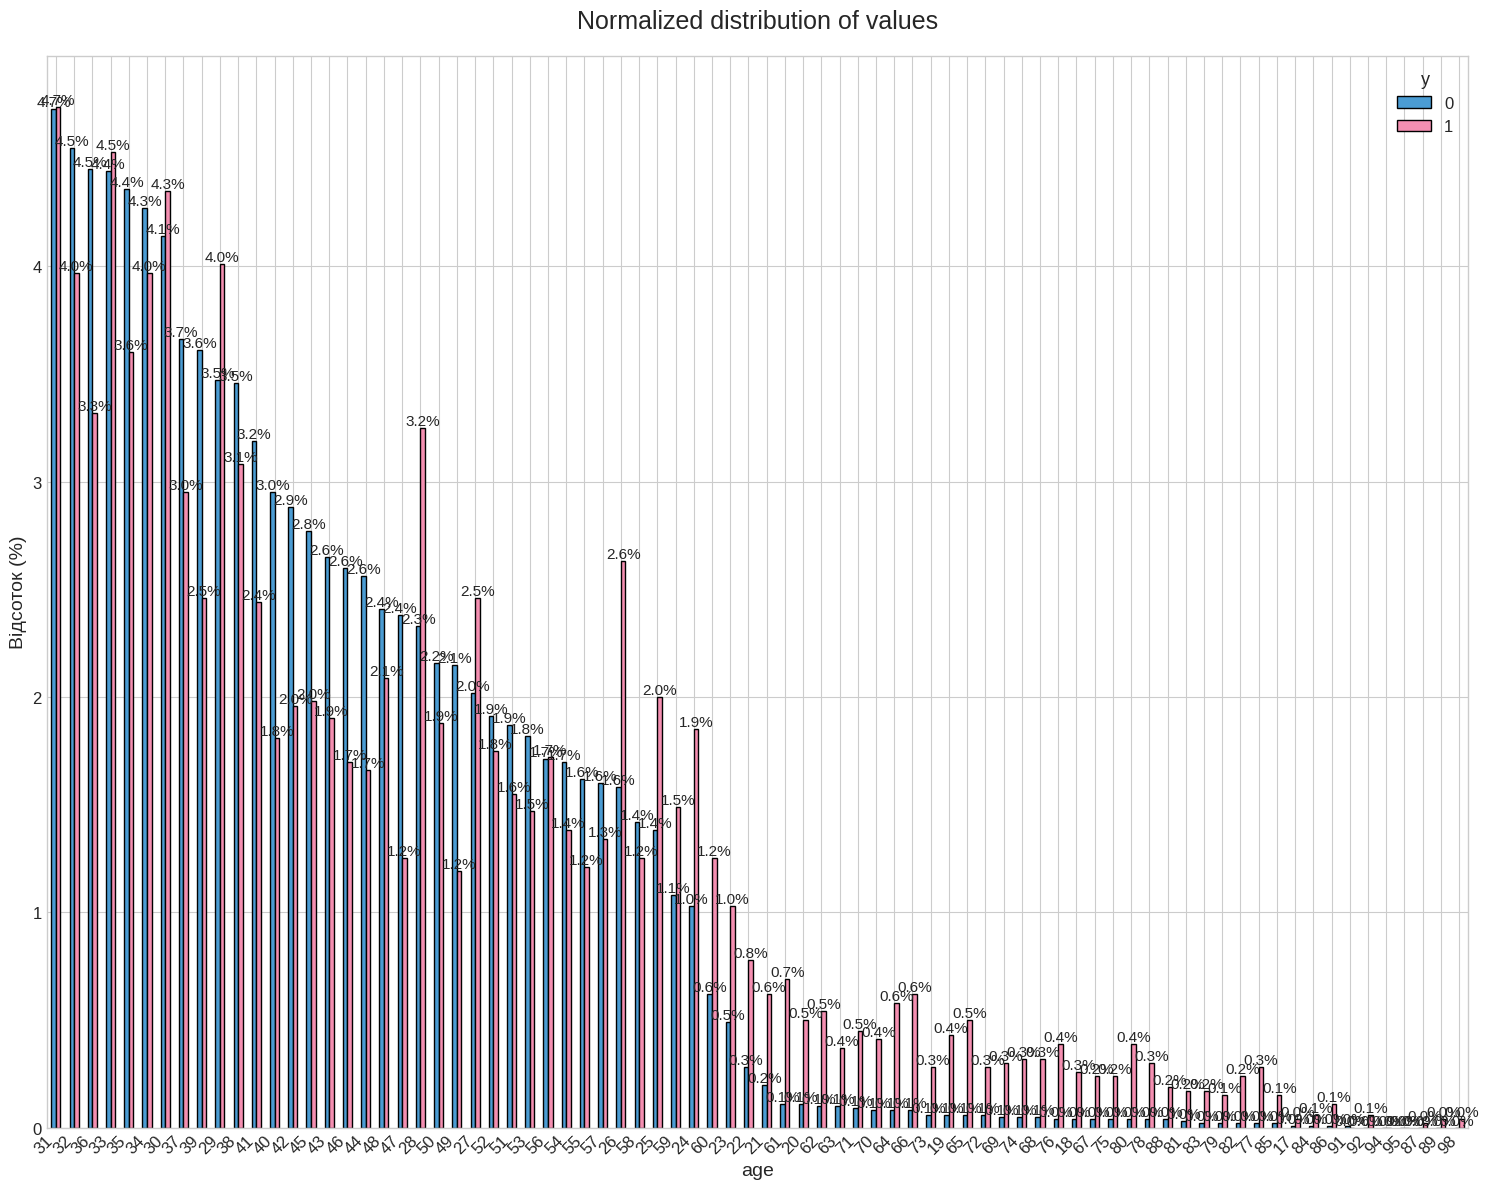

In [140]:
one_cat_countplot(df, 'age', 'y')

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def dist_box(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.set_style("whitegrid")

    # Гістограма
    sns.histplot(df[column], kde=True, ax=axes[0], color="#4B9CD3")  # синій
    axes[0].set_title(f"Розподіл значень: {column}", fontsize=14, pad=15)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Кількість")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color="#F48FB1")  # рожевий
    axes[1].set_title(f"Boxplot: {column}", fontsize=14, pad=15)
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


def outlier_range(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Викиди для {column}: менше ніж {lower_bound:.2f} або більше ніж {upper_bound:.2f}")
    return lower_bound, upper_bound

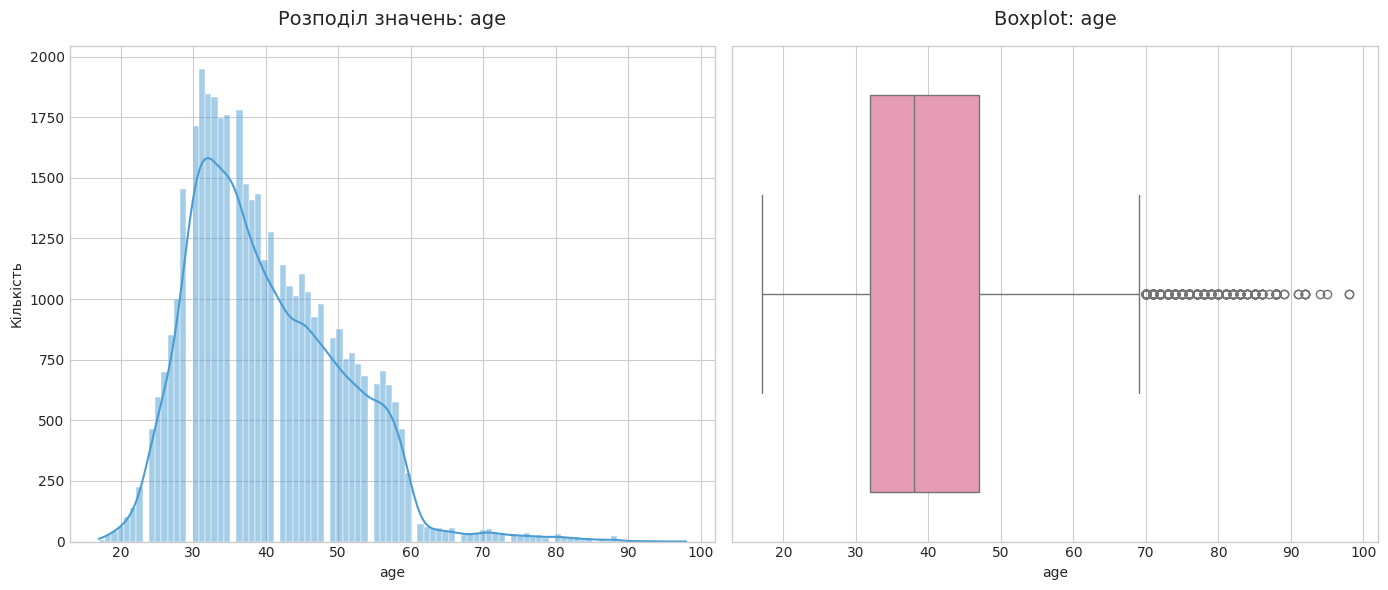

Викиди для age: менше ніж 9.50 або більше ніж 69.50


(np.float64(9.5), np.float64(69.5))

In [142]:
# Виклик для прикладу
dist_box(df, 'age')
outlier_range(df, 'age')

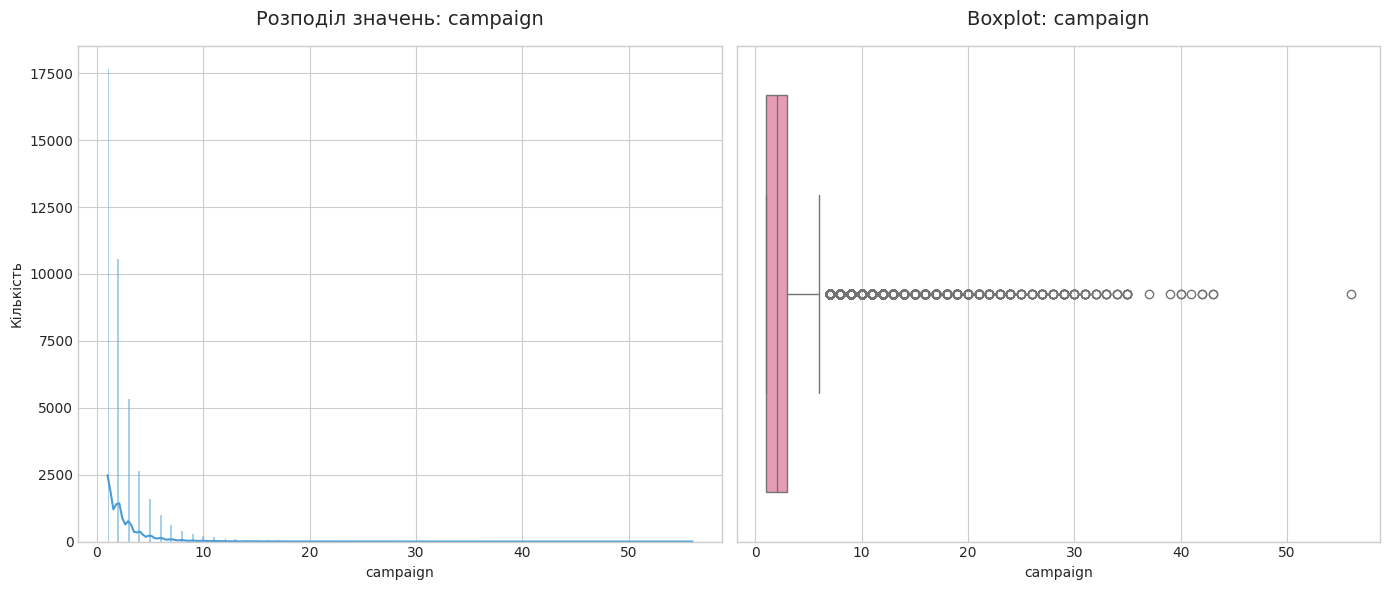

Викиди для campaign: менше ніж -2.00 або більше ніж 6.00


(np.float64(-2.0), np.float64(6.0))

In [143]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

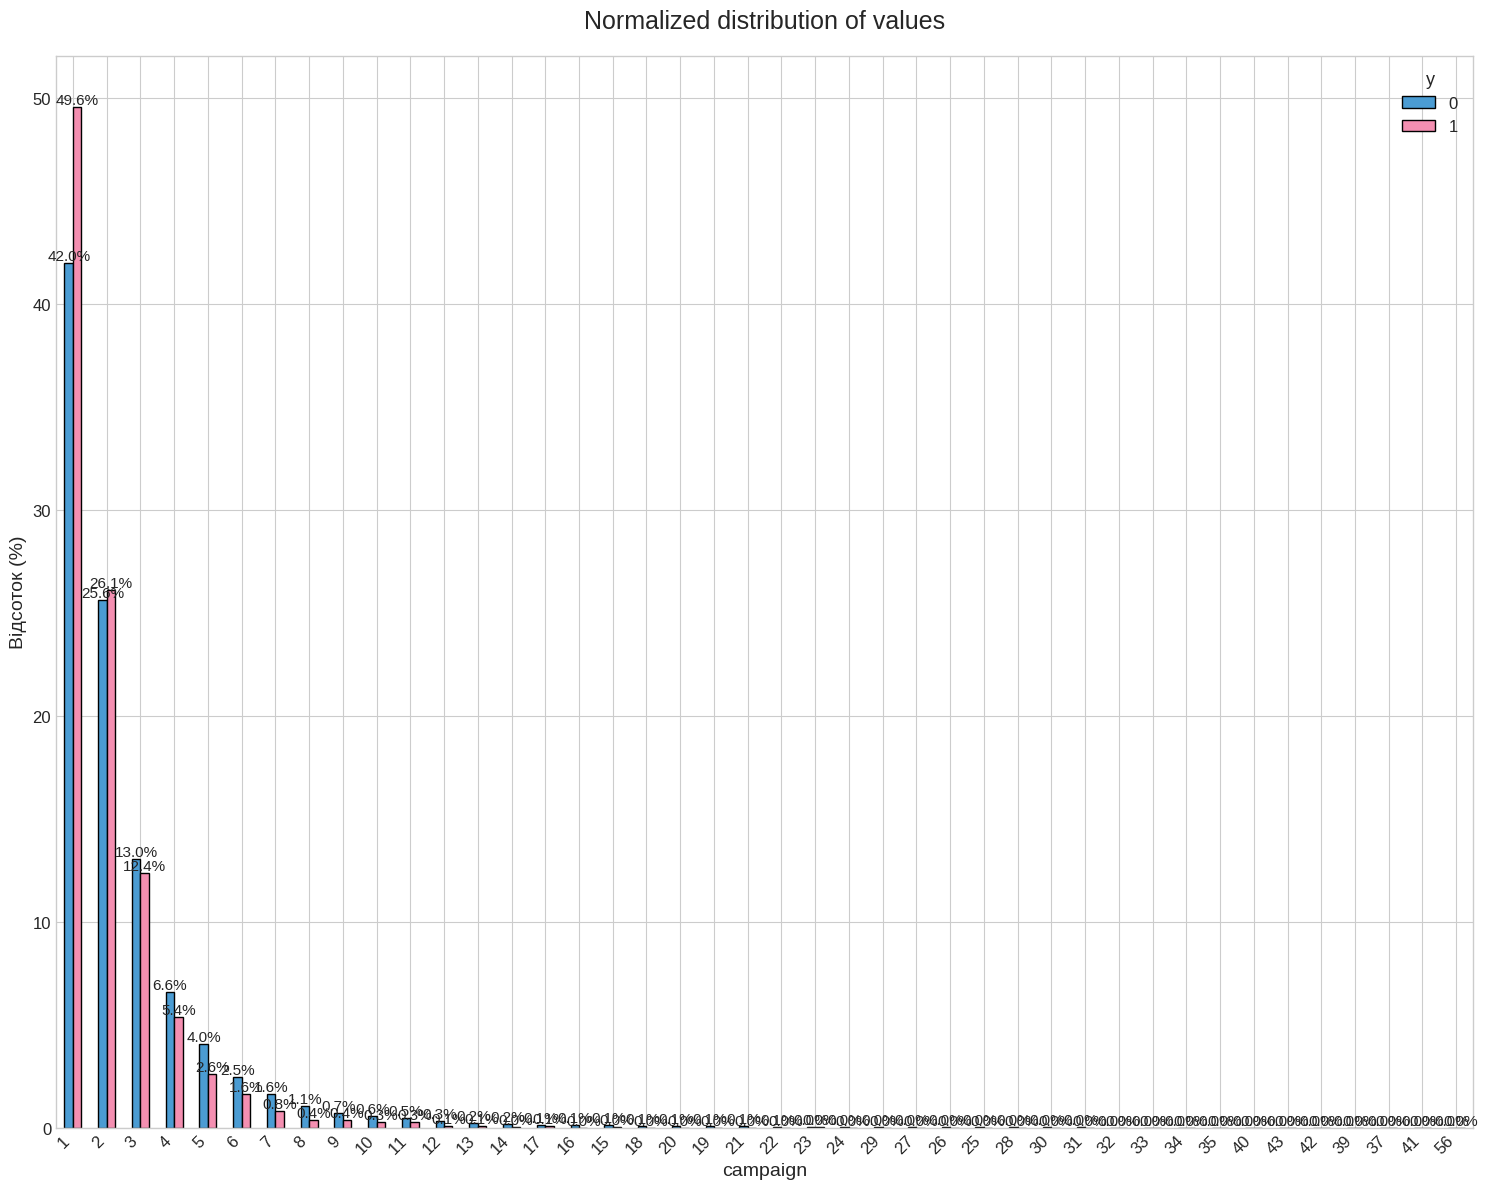

In [144]:
one_cat_countplot(df, 'campaign', 'y')

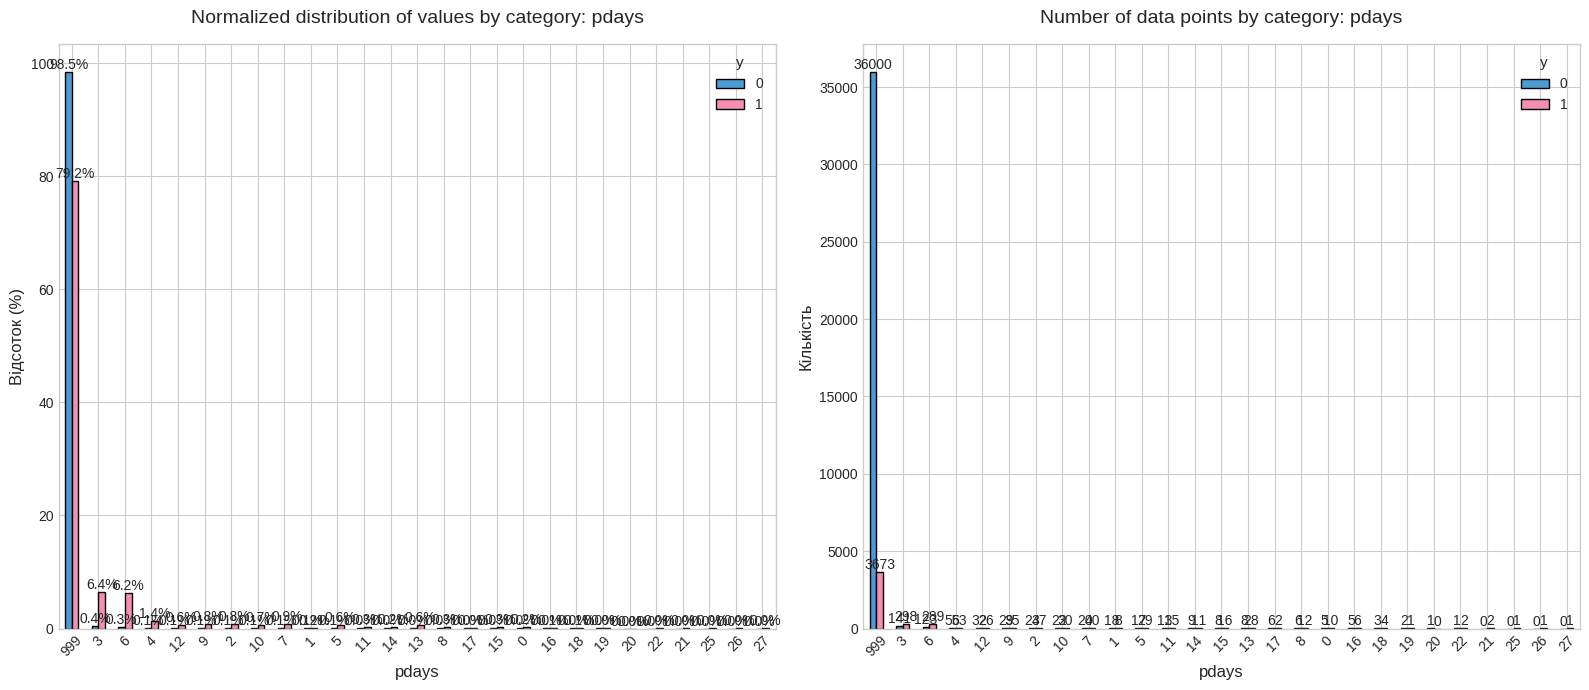

In [145]:
uni_cat_target_compare(df, 'pdays')

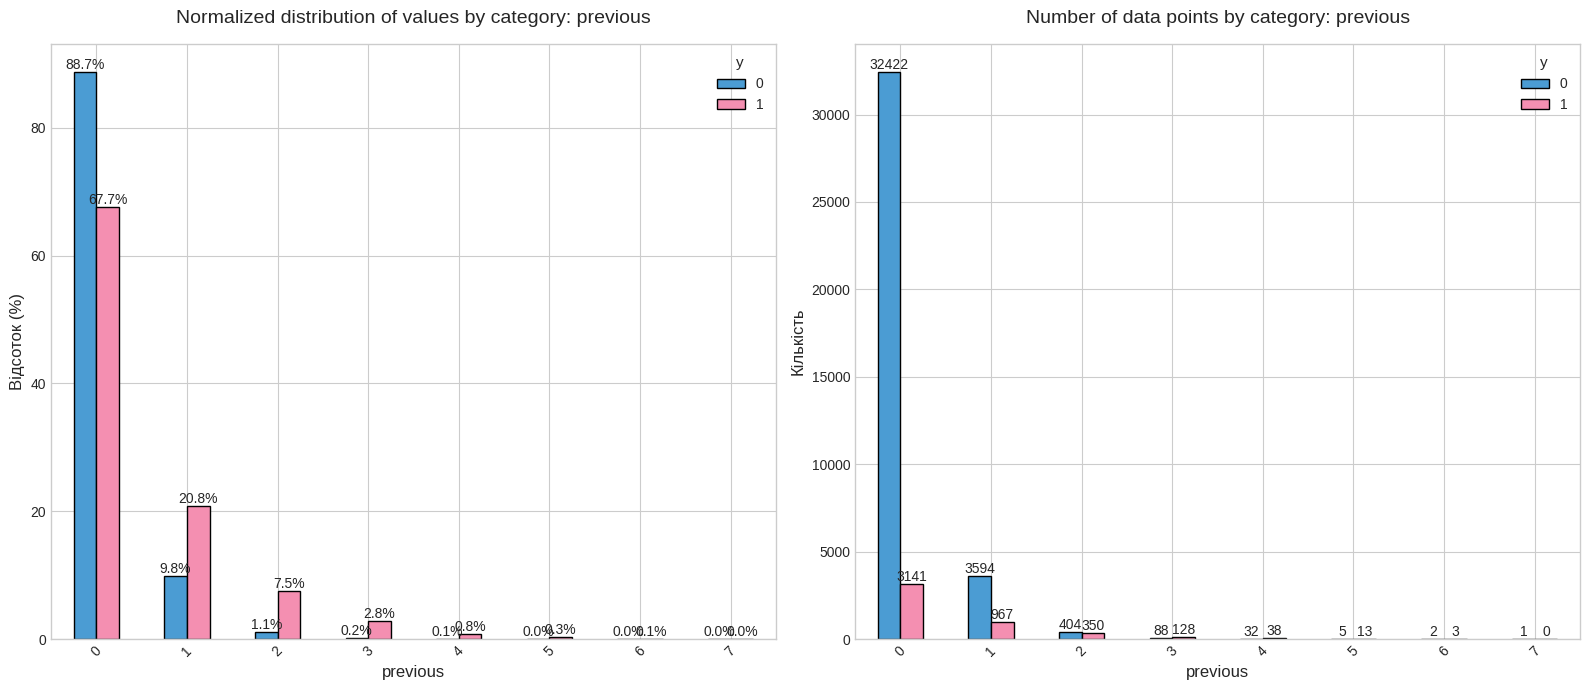

In [146]:
uni_cat_target_compare(df, 'previous')

Спостереження про аналіз викидів та розподілу числових змінних:
* campaign (кількість контактів у поточній кампанії): після 6
контактів присутня велика кількість викидів. Малоймовірно, що клієнт змінить своє рішення після 3-го контакту.
* pdays (кількість днів, що пройшли після контакту клієнта у попередній кампанії, 999 — ніколи не контактували): якщо клієнт раніше не контактував, ймовірність підписання строкового депозиту низька.
* previous (кількість контактів з цим клієнтом до поточної кампанії): аналогічна ситуація — чим більше попередніх контактів, тим ймовірність успіху вищої не спостерігається.


### Атрибути соціально-економічного контексту

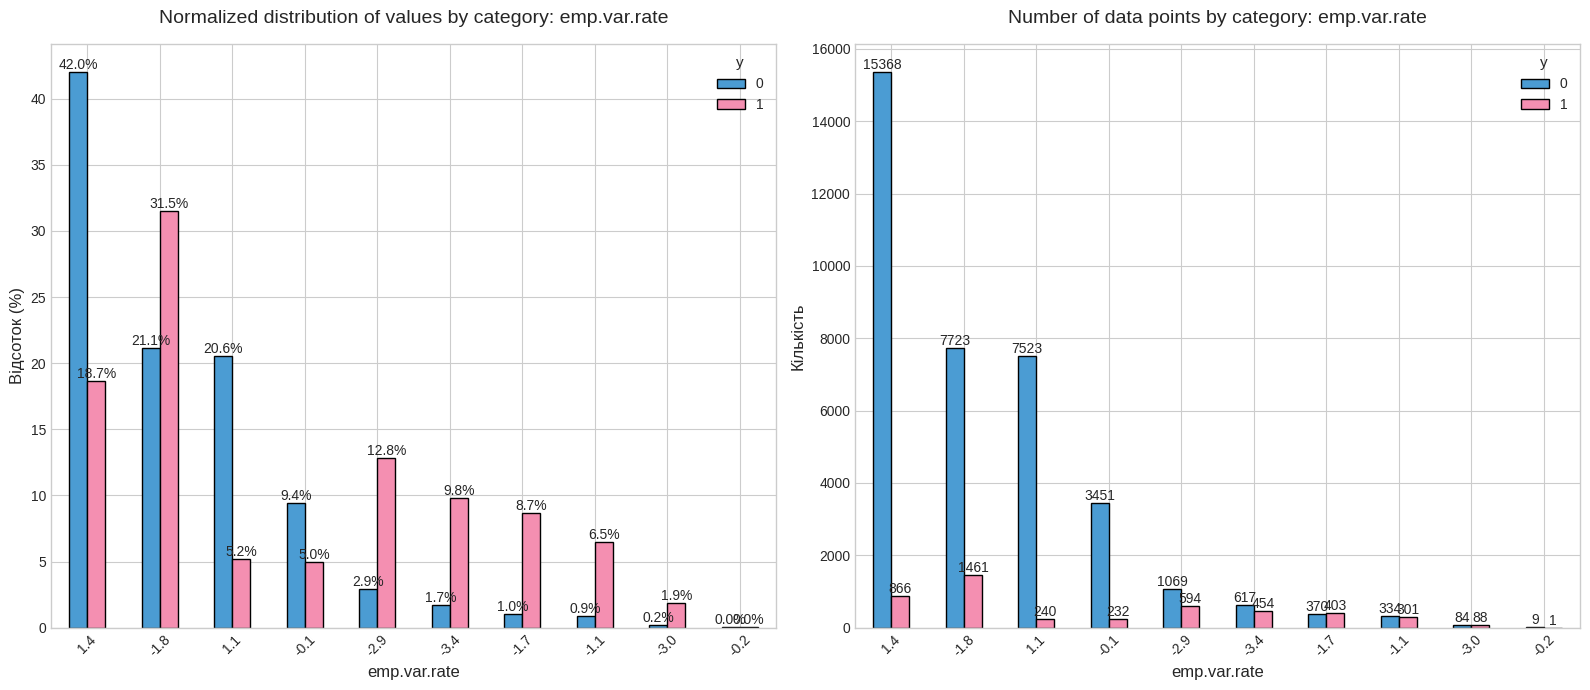

In [147]:
uni_cat_target_compare(df, 'emp.var.rate')

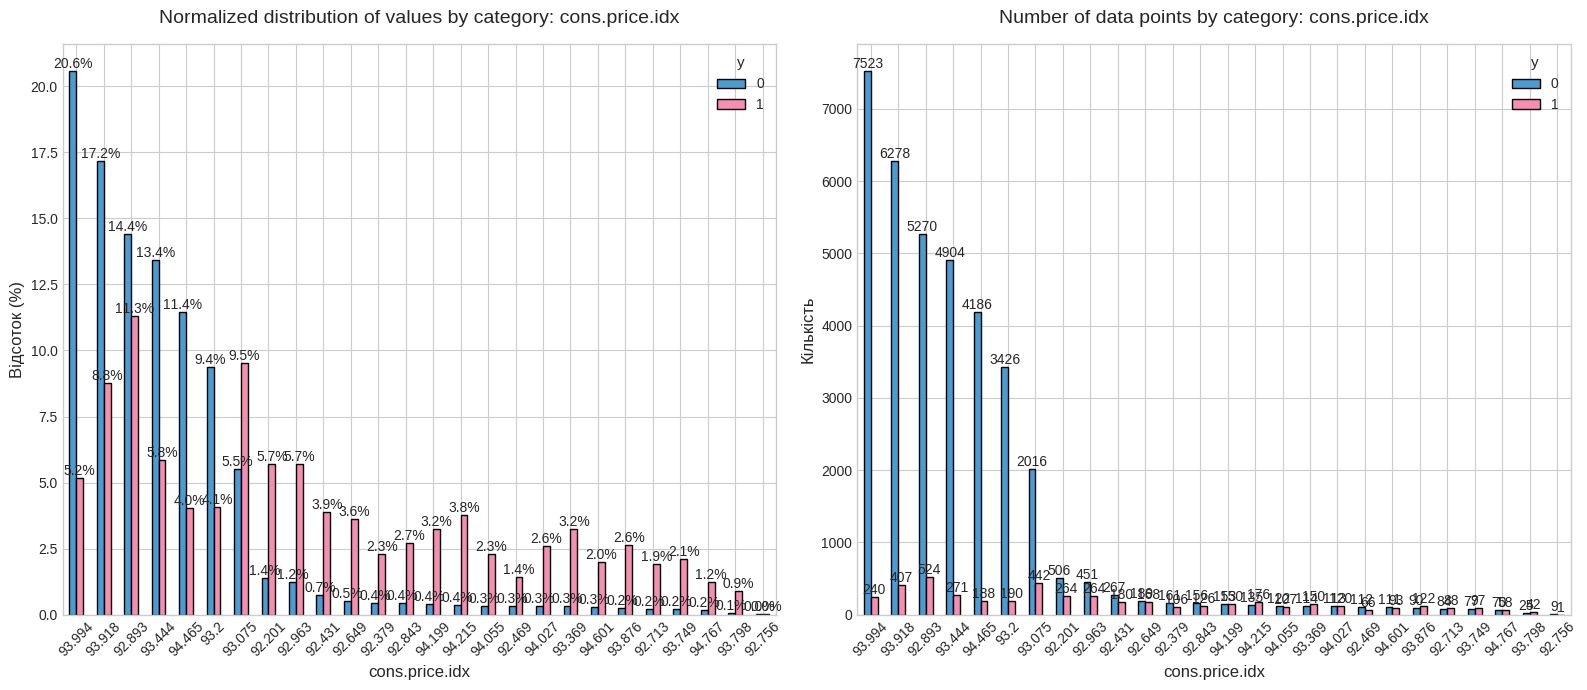

In [148]:
uni_cat_target_compare(df, 'cons.price.idx')

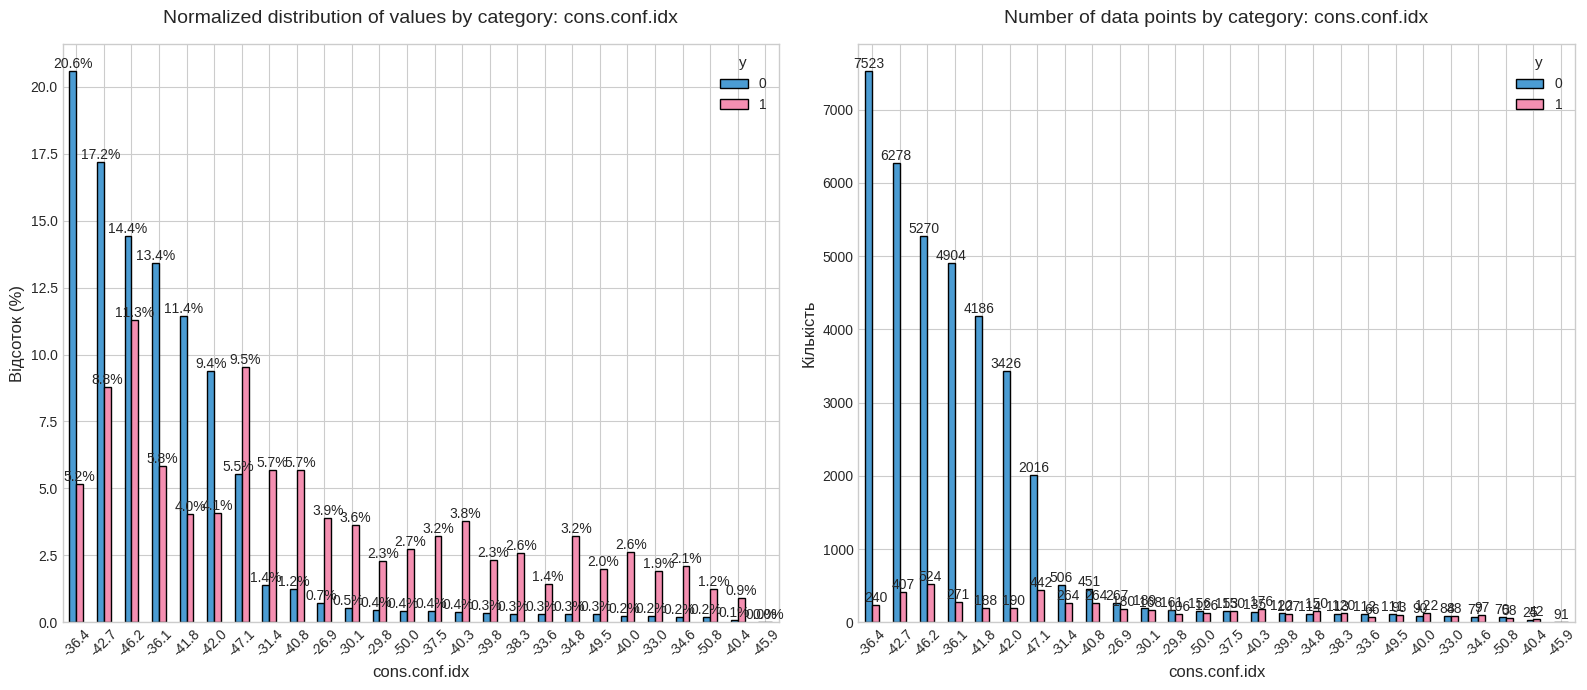

In [149]:
uni_cat_target_compare(df, 'cons.conf.idx')

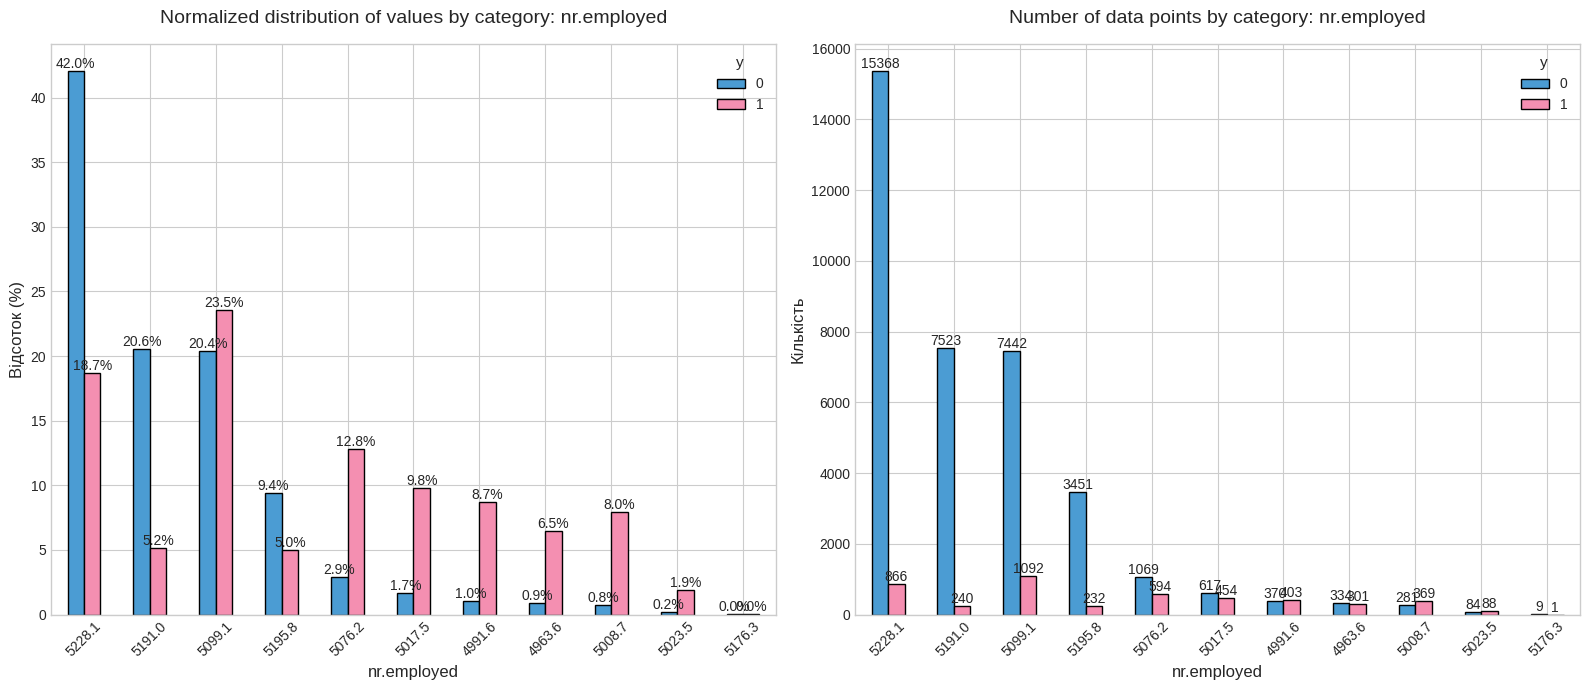

In [150]:
uni_cat_target_compare(df, 'nr.employed')

In [151]:
import pandas as pd

# Опції для відображення на повний екран
pd.set_option('display.max_colwidth', None)   # не обрізати довгі тексти
pd.set_option('display.expand_frame_repr', False)  # не переносити на новий рядок
pd.set_option('display.max_rows', None)   # показати всі рядки
pd.set_option('display.max_columns', None)  # показати всі стовпці
pd.set_option('display.width', 2000)  # ширина таблиці

# Дані для висновків по соціально-економічних атрибутах
data_econ = {
    "Атрибут": [
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed"
    ],
    "Висновки": [
        "Рівень зміни зайнятості: високі значення → ринок праці зростає, низькі/від’ємні → безробіття зростає. При збільшенні безробіття ймовірність оформлення кредиту зростає.",
        "Індекс споживчих цін: високі значення → інфляція, товари дорожчають; низькі → можлива дефляція. Значення не впливають на цільову змінну.",
        "Індекс споживчої довіри: високі значення → люди більше витрачають, низькі → більше заощаджують. Значення не впливають на цільову змінну.",
        "3-місячна ставка Euribor: високі значення → кредити дорожчають, економічна активність сповільнюється; низькі → кредити дешевші, стимулює витрати.",
        "Кількість зайнятих: зростання → позитивний сигнал (більше людей працюють), зменшення → економічні труднощі. Чим менше зайнятих, тим вища ймовірність оформлення строкового депозиту."
    ]
}

# Створення DataFrame
df_econ_summary = pd.DataFrame(data_econ)

# Вивід
df_econ_summary

Атрибут                                                                                                                                                                              Висновки
0    emp.var.rate               Рівень зміни зайнятості: високі значення → ринок праці зростає, низькі/від’ємні → безробіття зростає. При збільшенні безробіття ймовірність оформлення кредиту зростає.
1  cons.price.idx                                              Індекс споживчих цін: високі значення → інфляція, товари дорожчають; низькі → можлива дефляція. Значення не впливають на цільову змінну.
2   cons.conf.idx                                              Індекс споживчої довіри: високі значення → люди більше витрачають, низькі → більше заощаджують. Значення не впливають на цільову змінну.
3       euribor3m                                     3-місячна ставка Euribor: високі значення → кредити дорожчають, економічна активність сповільнюється; низькі → кредити дешевші, стимулює витрати.
4     nr.employed  Кількість зайнятих: зростання → позитивний сигнал (більше людей працюють), зменшення → економічні труднощі. Чим менше зайнятих, тим вища ймовірність оформлення строкового депозиту.

### Кореляційний аналіз числових змінних

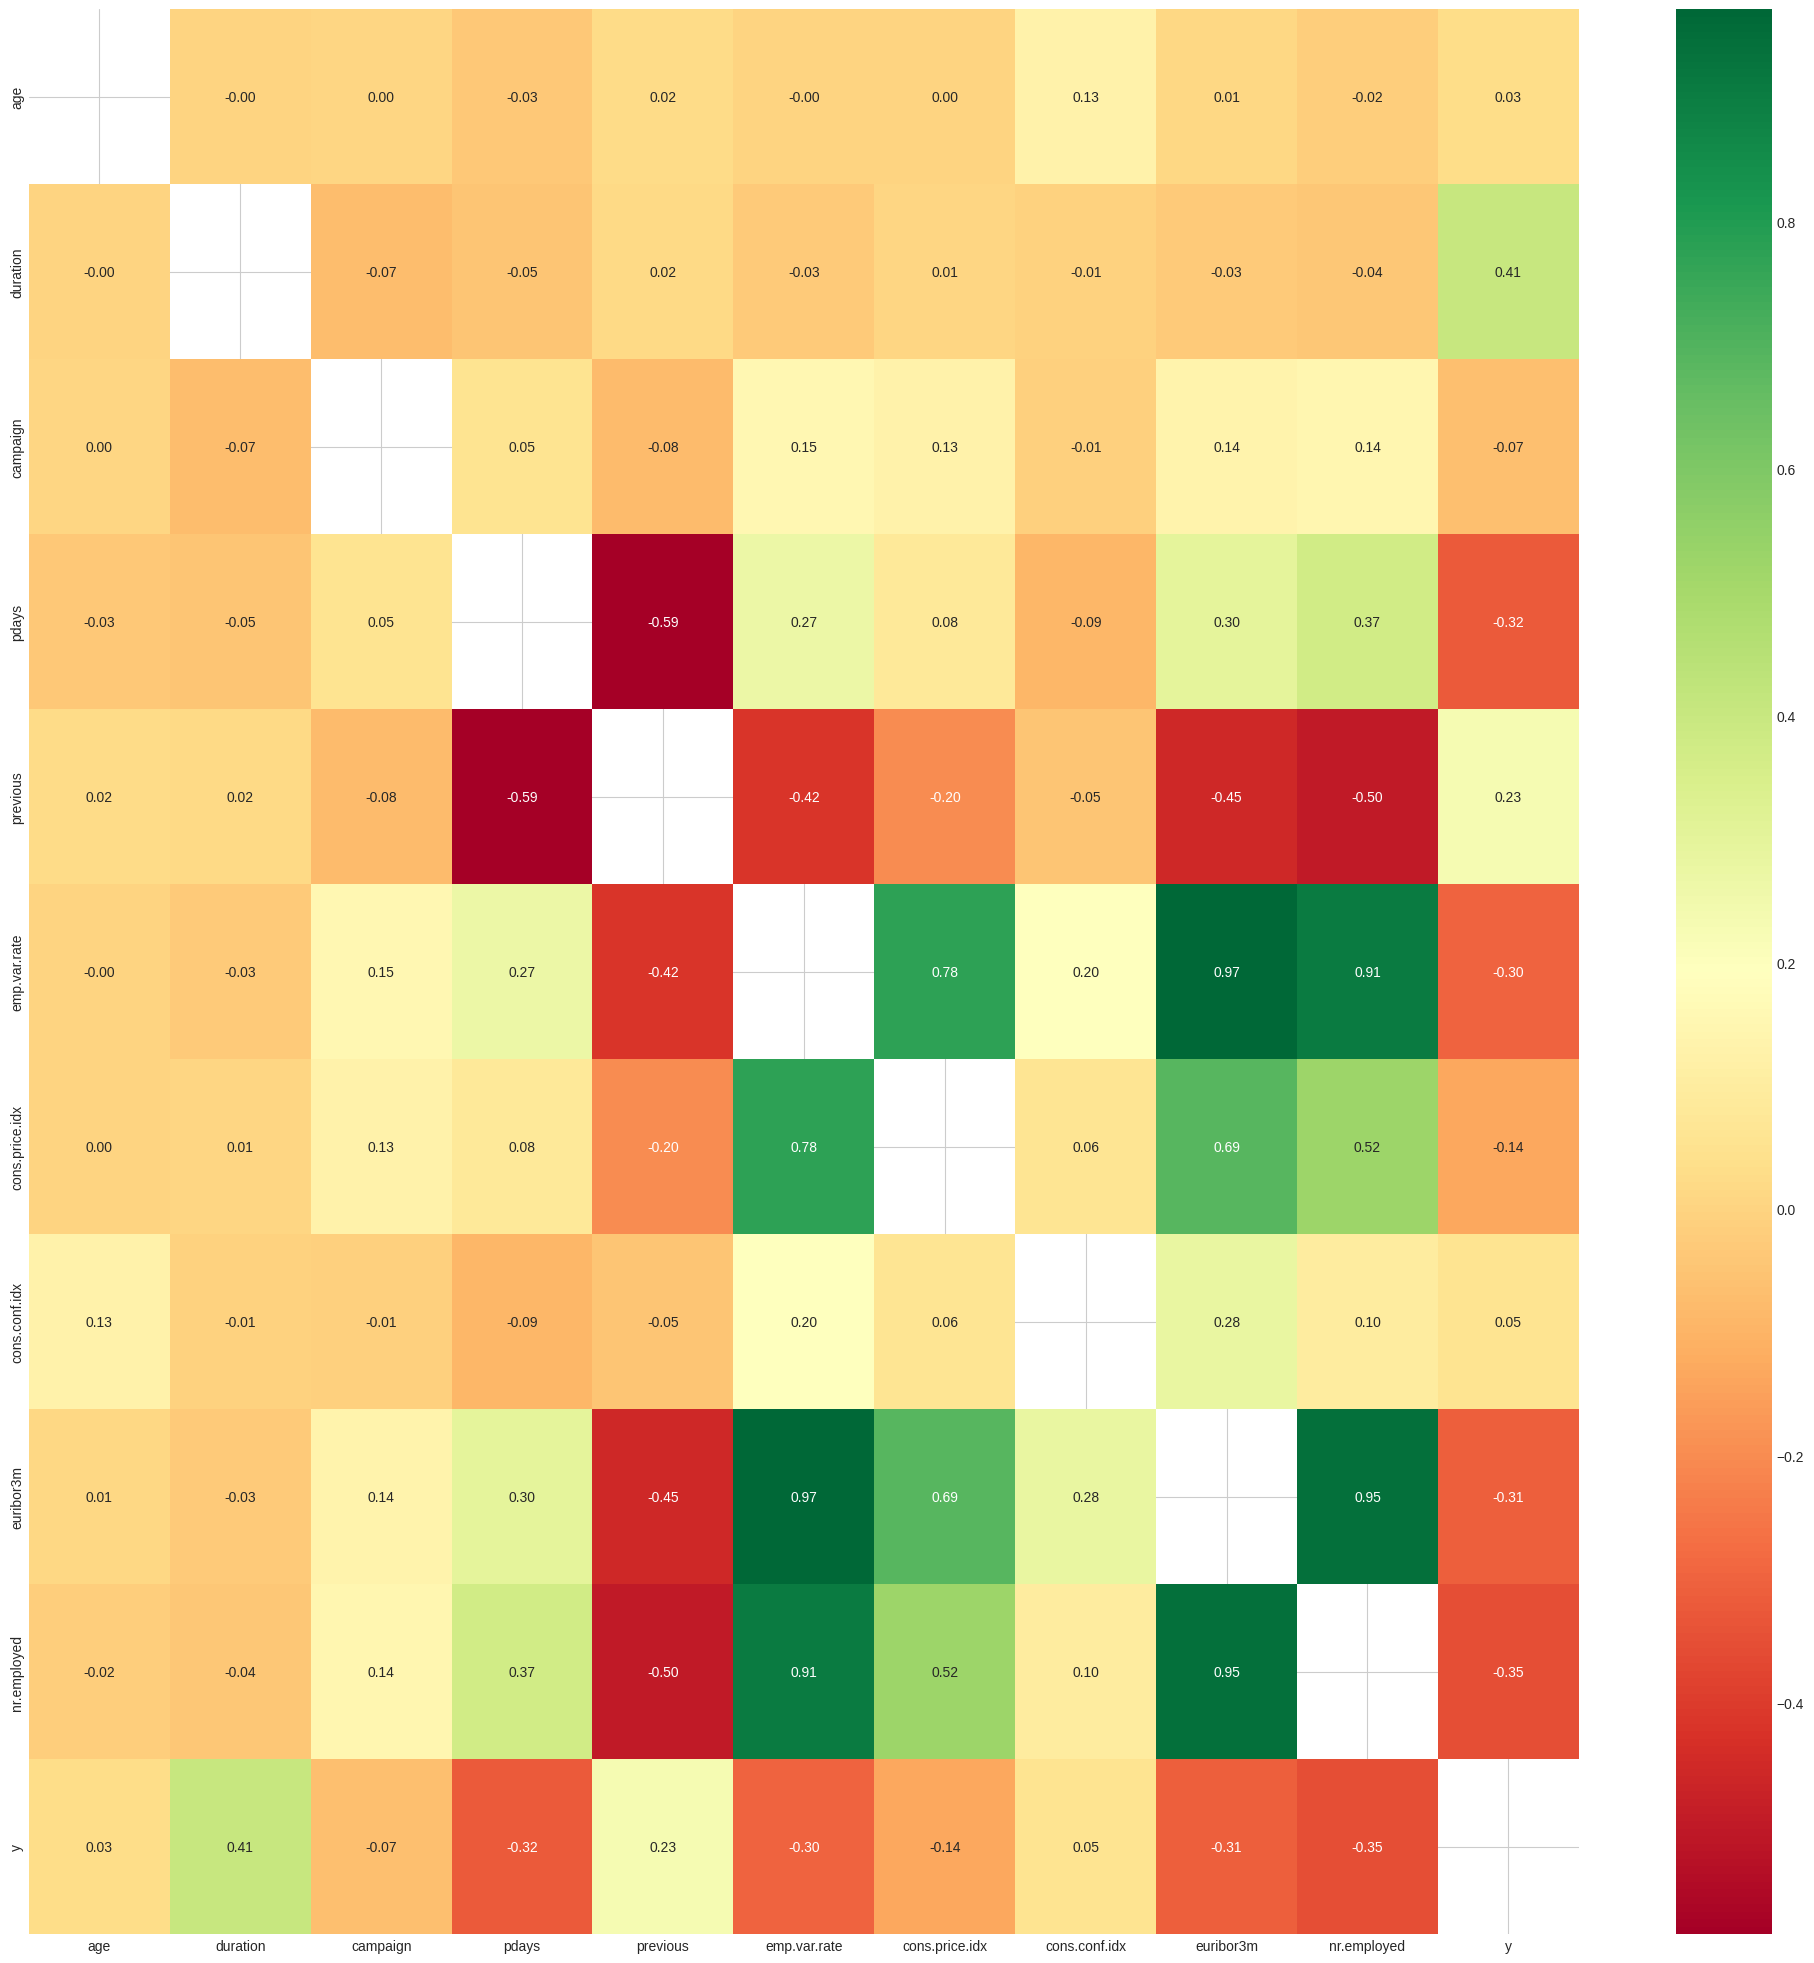

In [152]:
corr_df = df.select_dtypes(include=["int64","float64"]).corr()
corr_df['pdays'] = corr_df['pdays'].replace(999, 0)

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df[corr_df < 0.9999], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [153]:
import pandas as pd

# Опції для відображення на повний екран
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

# Дані для підсумків кореляційного аналізу
data_corr = {
    "Змінні": [
        "emp.var.rate ↔ nr.employed",
        "euribor3m ↔ emp.var.rate",
        "euribor3m ↔ nr.employed",
        "cons.price.idx ↔ emp.var.rate",
        "cons.price.idx ↔ euribor3m, nr.employed",
        "Усі соціально-економічні атрибути",
        "previous ↔ nr.employed, euribor3m, emp.var.rate, cons.price.idx",
        "pdays ↔ previous",
        "Усі змінні (крім previous і duration)",
        "duration ↔ y",
        "pdays ↔ y"
    ],
    "Висновки": [
        "Сильна позитивна кореляція між рівнем зміни зайнятості та кількістю зайнятих.",
        "3-місячна ставка Euribor корелює з рівнем зміни зайнятості.",
        "3-місячна ставка Euribor корелює з кількістю зайнятих.",
        "Індекс споживчих цін корелює з рівнем зміни зайнятості.",
        "Індекс споживчих цін корелює з Euribor і кількістю зайнятих.",
        "Усі соціально-економічні атрибути мають сильну позитивну кореляцію між собою.",
        "Кількість попередніх контактів має негативну кореляцію з економічними змінними.",
        "Кількість днів після останнього контакту сильно негативно корелює з кількістю попередніх контактів.",
        "Мають негативну кореляцію з цільовою змінною.",
        "Позитивна кореляція з цільовою змінною (0.41).",
        "Негативна кореляція з цільовою змінною (-0.32)."
    ]
}

# Створення DataFrame
df_corr_summary = pd.DataFrame(data_corr)

# Вивід
df_corr_summary

Змінні                                                                                             Висновки
0                                        emp.var.rate ↔ nr.employed                        Сильна позитивна кореляція між рівнем зміни зайнятості та кількістю зайнятих.
1                                          euribor3m ↔ emp.var.rate                                          3-місячна ставка Euribor корелює з рівнем зміни зайнятості.
2                                           euribor3m ↔ nr.employed                                               3-місячна ставка Euribor корелює з кількістю зайнятих.
3                                     cons.price.idx ↔ emp.var.rate                                              Індекс споживчих цін корелює з рівнем зміни зайнятості.
4                           cons.price.idx ↔ euribor3m, nr.employed                                         Індекс споживчих цін корелює з Euribor і кількістю зайнятих.
5                                 Усі соціально-економічні атрибути                        Усі соціально-економічні атрибути мають сильну позитивну кореляцію між собою.
6   previous ↔ nr.employed, euribor3m, emp.var.rate, cons.price.idx                      Кількість попередніх контактів має негативну кореляцію з економічними змінними.
7                                                  pdays ↔ previous  Кількість днів після останнього контакту сильно негативно корелює з кількістю попередніх контактів.
8                             Усі змінні (крім previous і duration)                                                        Мають негативну кореляцію з цільовою змінною.
9                                                      duration ↔ y                                                       Позитивна кореляція з цільовою змінною (0.41).
10                                                        pdays ↔ y                                                      Негативна кореляція з цільовою змінною (-0.32).

### Гіпотези щодо впливу окремих ознак на цільову змінну y

* Результат попередньої маркетингової кампанії (poutcome) є важливою ознакою: якщо попередня кампанія була успішною, ймовірність того, що клієнт оформить депозит у поточній кампанії, вища.
* Важливими є також спосіб (contact = cellular) та час (month, day_of_week) контакту з клієнтом.
* Чим нижчою є кількість зайнятих у країні (nr.employed, emp.var.rate), тим більшою є ймовірність оформлення строкового депозиту.
* Незважаючи на високі показники успіху серед клієнтів, з якими раніше не контактували, імовірність оформлення депозиту зростає, якщо клієнта вже контактували раніше (pdays, previous).


## План роботи

Оскільки завдання полягає у прогнозуванні, чи підпише клієнт строковий депозит на основі вхідних даних, то будемо використовувати методи бінарної класифікації:
* Логістична регресія
* Метод k найближчих сусідів (K-NN)
* Рішення на основі дерев (Decision Trees)

З огляду на значний дисбаланс класів (no = 88.73%, yes = 11.27%), може знадобитися застосування технік балансування датасету (oversampling або undersampling).

Для оцінки моделей доцільно використовувати метрику AUROC (Area Under the Receiver Operating Characteristic Curve). Вона добре підходить для порівняння моделей, оскільки показує, наскільки добре модель розрізняє класи (0 і 1), та дозволяє налаштовувати поріг прийняття рішень. Це допоможе уникати хибнопозитивних прогнозів або навпаки — зробити модель чутливішою для виявлення більшої кількості позитивних випадків.

Такий підхід допоможе забезпечити більш ефективну й справедливу оцінку моделі, особливо з урахуванням дисбалансу класів.


## 3. Попередня обробка даних

Виявлення викидів та видалення значень, що перевищують 95-й перцентиль.

In [154]:
df.describe()

age  duration  campaign    pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed        y
count 41188.00  41188.00  41188.00 41188.00  41188.00      41188.00        41188.00       41188.00   41188.00     41188.00 41188.00
mean     40.02    258.29      2.57   962.48      0.17          0.08           93.58         -40.50       3.62      5167.04     0.11
std      10.42    259.28      2.77   186.91      0.49          1.57            0.58           4.63       1.73        72.25     0.32
min      17.00      0.00      1.00     0.00      0.00         -3.40           92.20         -50.80       0.63      4963.60     0.00
25%      32.00    102.00      1.00   999.00      0.00         -1.80           93.08         -42.70       1.34      5099.10     0.00
50%      38.00    180.00      2.00   999.00      0.00          1.10           93.75         -41.80       4.86      5191.00     0.00
75%      47.00    319.00      3.00   999.00      0.00          1.40           93.99         -36.40       4.96      5228.10     0.00
max      98.00   4918.00     56.00   999.00      7.00          1.40           94.77         -26.90       5.04      5228.10     1.00

In [155]:
# Splitting the data into two groups
df1 = df[df['y'] == 1]
df0 = df[df['y'] == 0]

def outlier_analysis(df0, df1, col_name):

  print(f"{col_name} - Signed deposit")
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value1 = (Q1 - 1.5 * IQR)
  Max_value1 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which outliers exist: {}".format(Min_value1))
  print("Maximum value, above which outliers exist: {}".format(Max_value1))

  print(f"\n{col_name} - Did not sign deposit")
  Q1 = df0[col_name].quantile(0.25)
  Q3 = df0[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value2 = (Q1 - 1.5 * IQR)
  Max_value2 = (Q3 + 1.5 * IQR)
  print("Minimum value, below which outliers exist: {}".format(Min_value2))
  print("Maximum value, above which outliers exist: {}".format(Max_value2))

  return Max_value1, Max_value2

def kde_no_outliers(df0, df1, Max_value1, Max_value2, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column], label='Signed deposit')
  sns.kdeplot(df0[df0[column] <= Max_value2][column], label='Did not sign deposit')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

def one_d_num_analysis2(df0, df1, col_name):
  Max_value1, Max_value2 = outlier_analysis(df0, df1, col_name)
  print("\nRemoving outliers and plotting the distribution chart")
  kde_no_outliers(df0, df1, Max_value1, Max_value2, col_name)

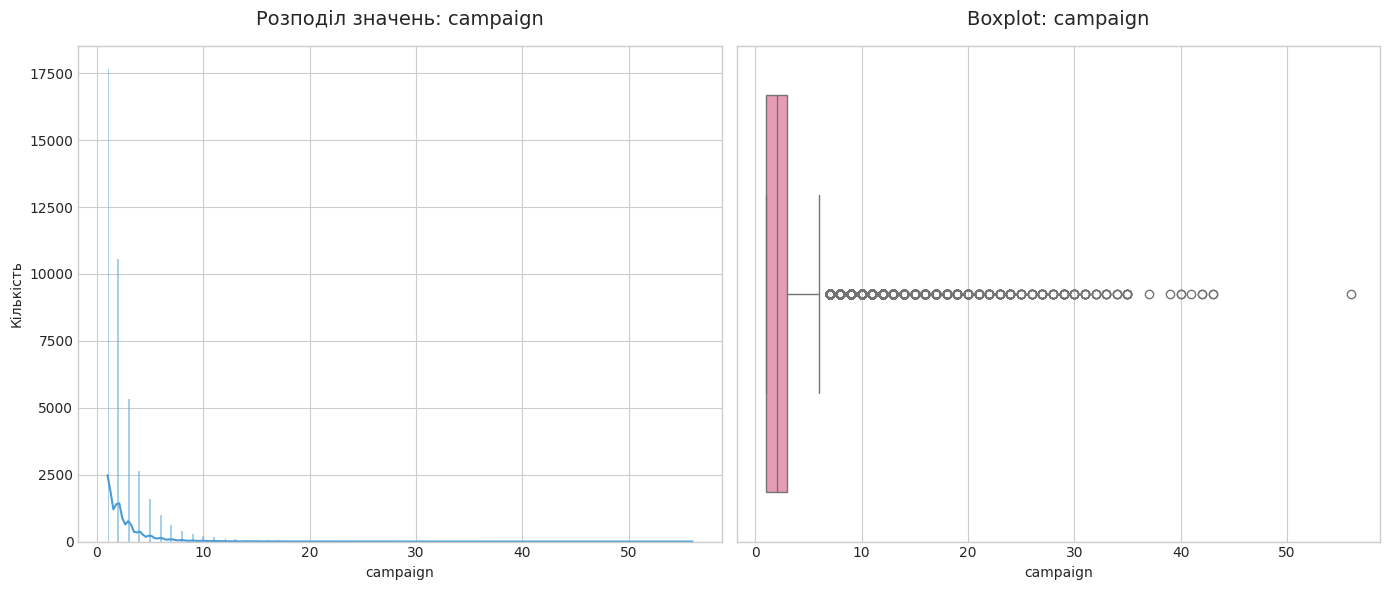

Викиди для campaign: менше ніж -2.00 або більше ніж 6.00


(np.float64(-2.0), np.float64(6.0))

In [156]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

campaign - Signed deposit
4.0
Minimum value, below which outliers exist: -5.0
Maximum value, above which outliers exist: 11.0

campaign - Did not sign deposit
6.0
Minimum value, below which outliers exist: -8.0
Maximum value, above which outliers exist: 16.0

Removing outliers and plotting the distribution chart


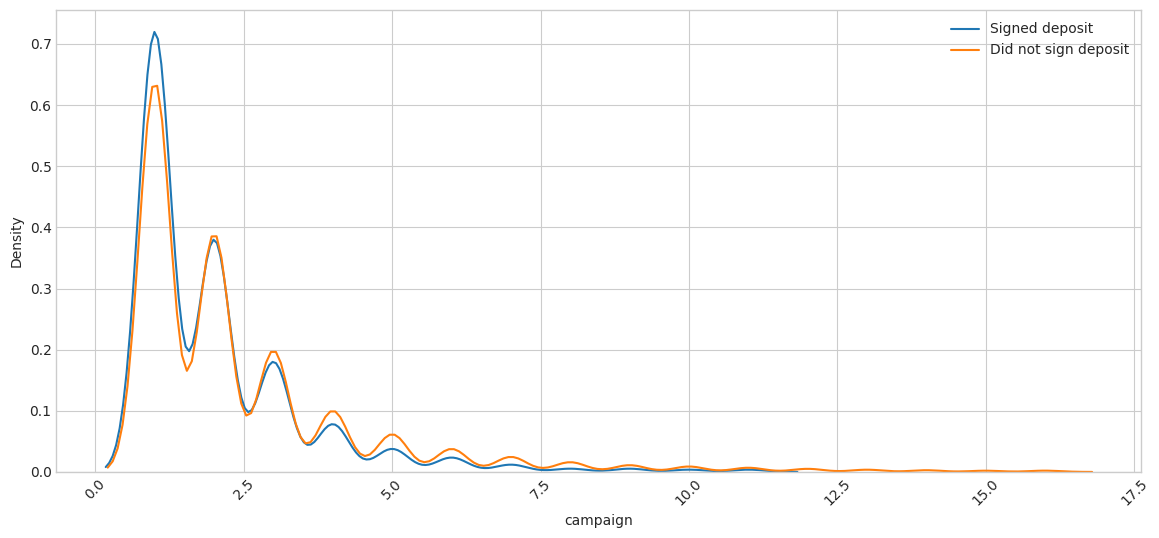

In [157]:
one_d_num_analysis2(df0, df1, 'campaign')

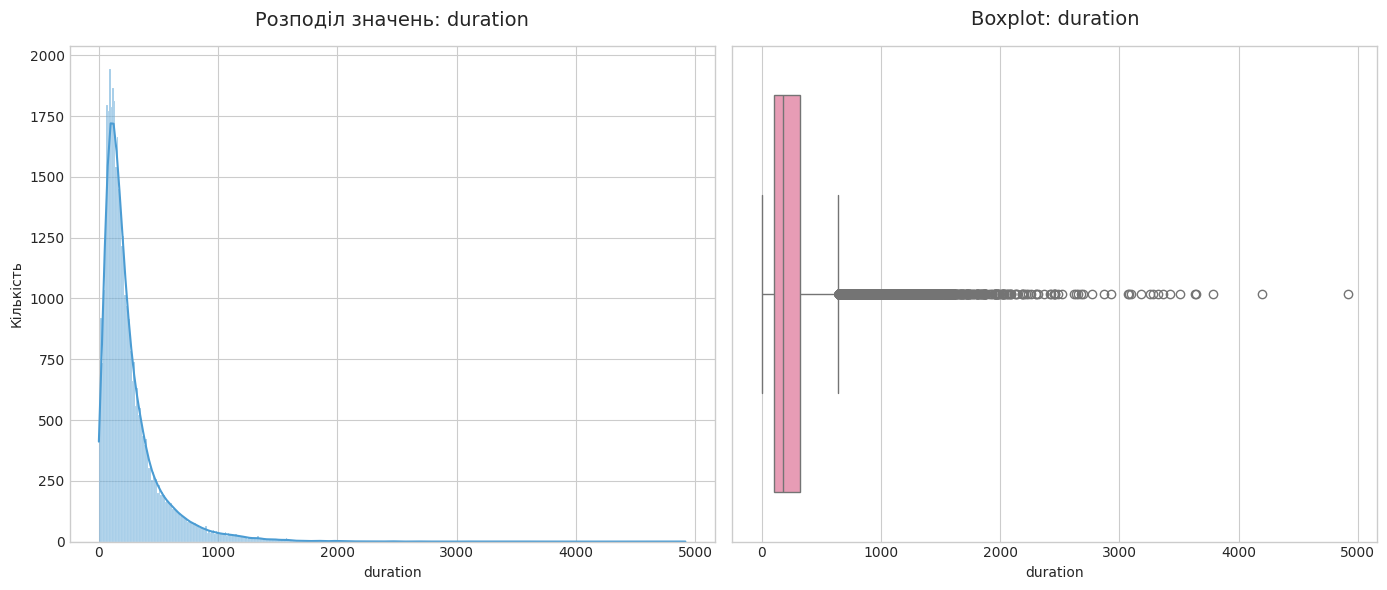

Викиди для duration: менше ніж -223.50 або більше ніж 644.50


(np.float64(-223.5), np.float64(644.5))

In [158]:
dist_box(df, 'duration')
outlier_range(df, 'duration')

duration - Signed deposit
1058.0
Minimum value, below which outliers exist: -1334.0
Maximum value, above which outliers exist: 2898.0

duration - Did not sign deposit
500.0
Minimum value, below which outliers exist: -655.0
Maximum value, above which outliers exist: 1345.0

Removing outliers and plotting the distribution chart


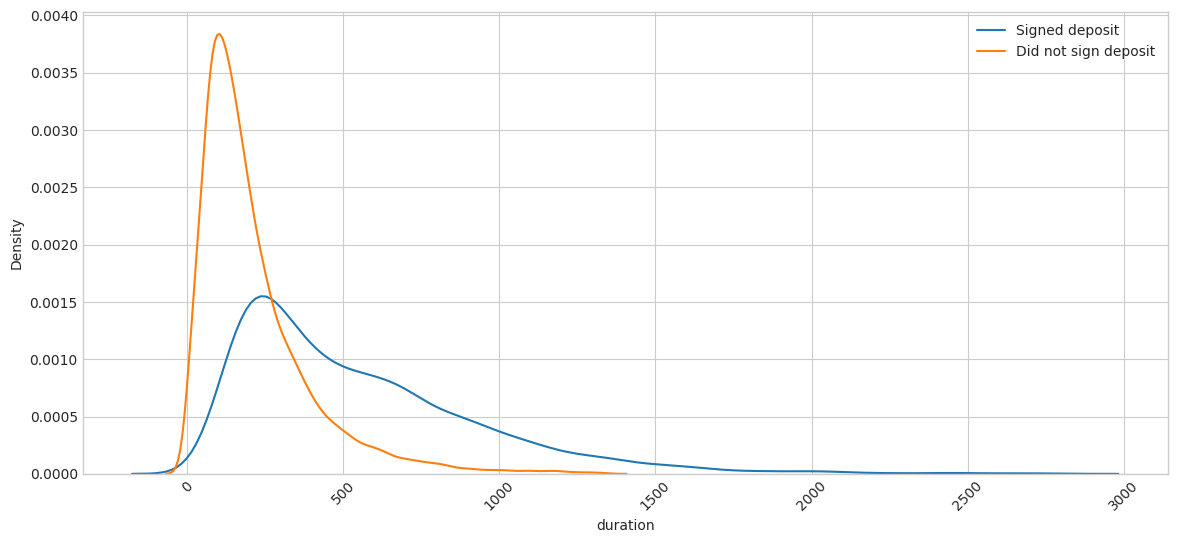

In [159]:
one_d_num_analysis2(df0, df1, 'duration')

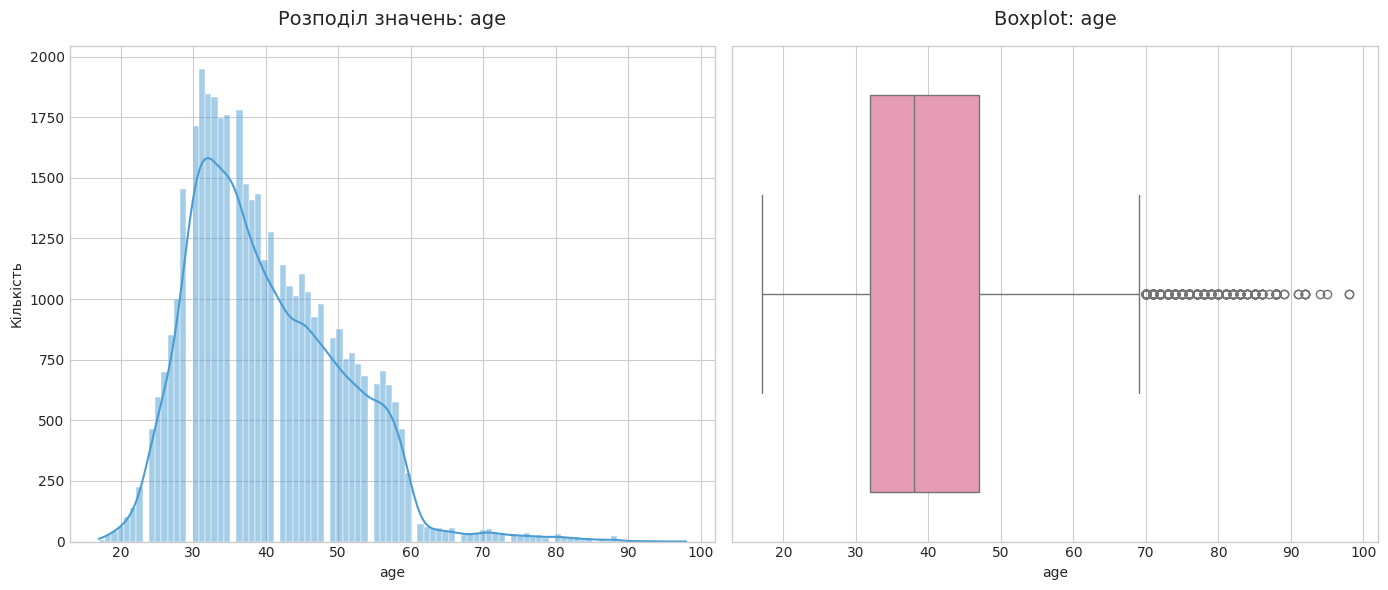

Викиди для age: менше ніж 9.50 або більше ніж 69.50


(np.float64(9.5), np.float64(69.5))

In [160]:
dist_box(df, 'age')
outlier_range(df, 'age')

age - Signed deposit
38.0
Minimum value, below which outliers exist: -26.0
Maximum value, above which outliers exist: 126.0

age - Did not sign deposit
25.0
Minimum value, below which outliers exist: -5.5
Maximum value, above which outliers exist: 94.5

Removing outliers and plotting the distribution chart


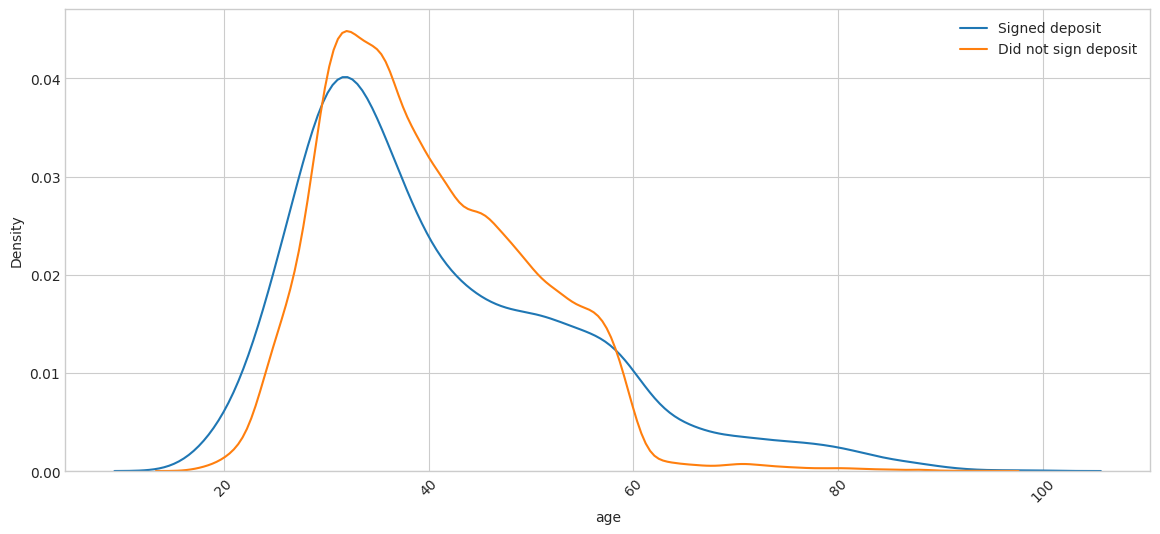

In [161]:
one_d_num_analysis2(df0, df1, 'age')

In [162]:
df['pdays'] = df['pdays'].replace(999, 0) # Щоб спростити інтерпретацію, значення pdays, що дорівнюють 999, слід замінити на 0.

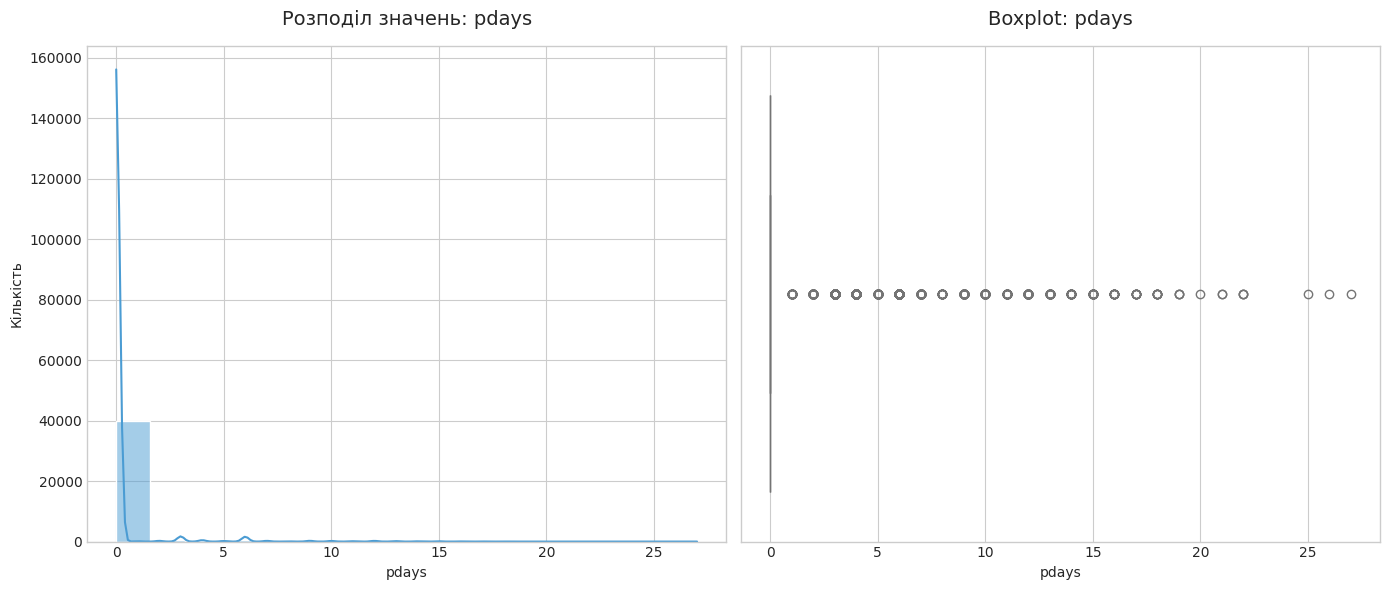

Викиди для pdays: менше ніж 0.00 або більше ніж 0.00


(np.float64(0.0), np.float64(0.0))

In [163]:
dist_box(df, 'pdays')
outlier_range(df, 'pdays')

pdays - Signed deposit
0.0
Minimum value, below which outliers exist: 999.0
Maximum value, above which outliers exist: 999.0

pdays - Did not sign deposit
0.0
Minimum value, below which outliers exist: 999.0
Maximum value, above which outliers exist: 999.0

Removing outliers and plotting the distribution chart


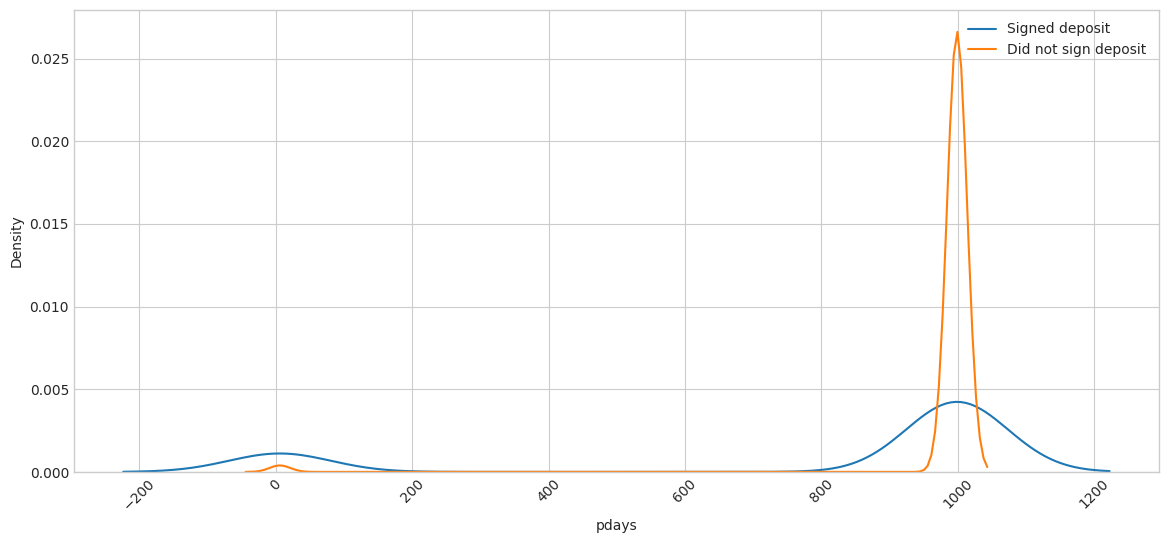

In [164]:
one_d_num_analysis2(df0, df1, 'pdays')

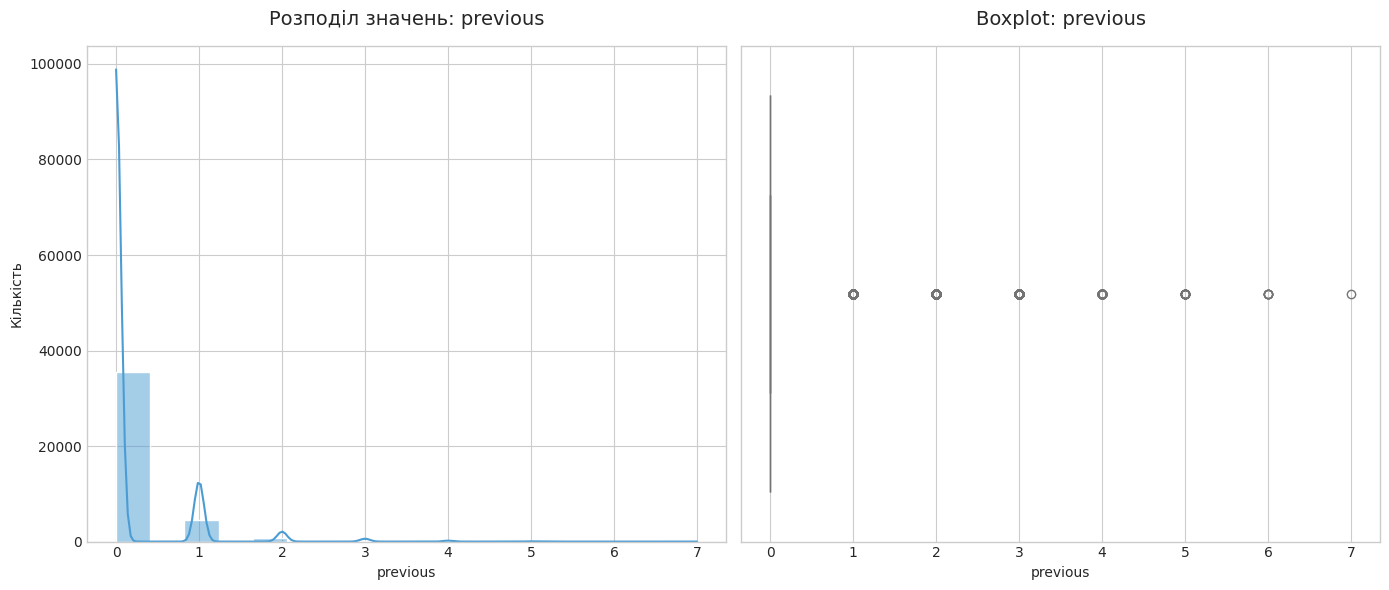

Викиди для previous: менше ніж 0.00 або більше ніж 0.00


(np.float64(0.0), np.float64(0.0))

In [165]:
dist_box(df, 'previous')
outlier_range(df, 'previous')

previous - Signed deposit
2.0
Minimum value, below which outliers exist: -3.0
Maximum value, above which outliers exist: 5.0

previous - Did not sign deposit
1.0
Minimum value, below which outliers exist: -1.5
Maximum value, above which outliers exist: 2.5

Removing outliers and plotting the distribution chart


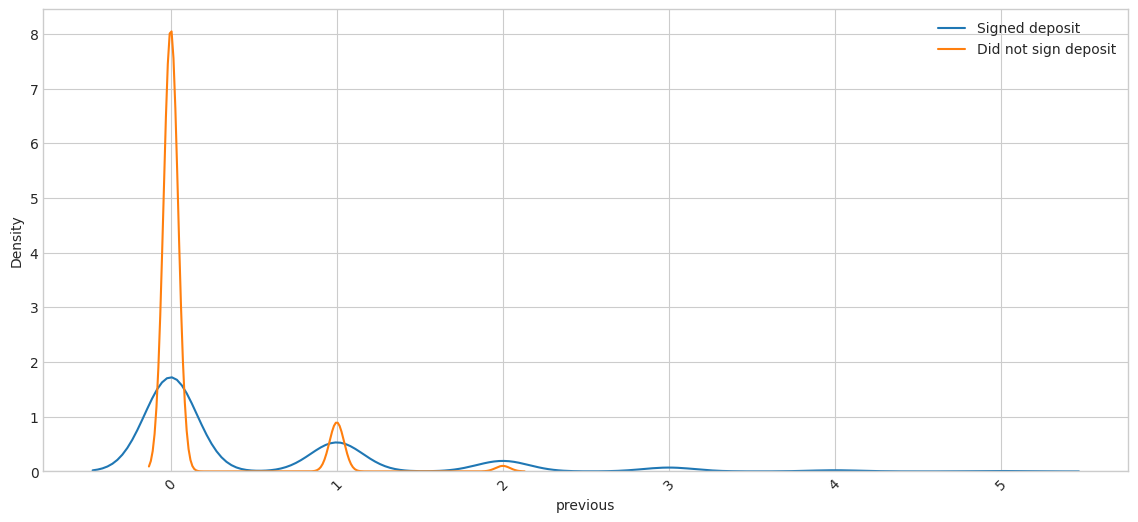

In [166]:
one_d_num_analysis2(df0, df1, 'previous')

### Аналіз викидів

* age: викиди після 69.
* campaign (кількість контактів у межах поточної кампанії): є залишкові значення понад 15.
* duration: має викиди після значення 2000.
* pdays: є кілька залишкових значень понад 15.
* previous: є кілька залишкових значень понад 3.

Видалення викидів для duration, campaign, pdays та previous може покращити модель, оскільки дуже малі значення не мають суттєвого впливу на цільову змінну. Варто видалити їх, щоб перевірити, чи покращиться продуктивність моделі.


In [167]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Initialize
df_filtered = df.copy()

# Remove outliers from specified columns
for column in ['campaign', 'duration', 'pdays', 'previous']:
    df_filtered = remove_outliers_iqr(df_filtered, column)

df = df_filtered

In [168]:
df.describe()

age  duration  campaign    pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed        y
count 39207.00  39207.00  39207.00 39207.00  39207.00      39207.00        39207.00       39207.00   39207.00     39207.00 39207.00
mean     39.95    251.37      2.44     0.00      0.11          0.16           93.58         -40.58       3.72      5172.18     0.09
std      10.17    235.39      2.13     0.00      0.34          1.53            0.57           4.52       1.68        67.33     0.29
min      17.00      0.00      1.00     0.00      0.00         -3.40           92.20         -50.80       0.63      4963.60     0.00
25%      32.00    101.00      1.00     0.00      0.00         -1.80           93.08         -42.70       1.41      5099.10     0.00
50%      38.00    177.00      2.00     0.00      0.00          1.10           93.75         -41.80       4.86      5191.00     0.00
75%      47.00    315.00      3.00     0.00      0.00          1.40           93.99         -36.40       4.96      5228.10     0.00
max      98.00   1730.00     16.00     0.00      2.00          1.40           94.77         -26.90       5.04      5228.10     1.00

## Створення ознак

In [169]:
# Define a mapping between education categories and numerical values
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}

# Convert the 'education' column to numerical representation
df['education_numeric'] = df['education'].map(education_mapping)

# Define bins using numerical values
bins = [0, 3, 4, 6, 8]

# Use pd.cut with numerical bins and labels
df['education_bins'] = pd.cut(df['education_numeric'], bins=bins,
                               labels=['primary', 'secondary', 'higher',
                                       'unknown'], include_lowest=True,
                                      duplicates='drop', ordered=False)
# drop the temporary columns
df = df.drop(['education_numeric', 'education'], axis=1)

In [170]:
# Create a new categorical column 'age_bin' by binning the 'age' column into 3 groups:
# - 0 to 30 → 'young'
# - 30 to 50 → 'middle-aged'
# - 50 to 100 → 'senior'
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])
df = df.drop(['age'], axis=1)

In [171]:
# Sum current and previous contacts into a new 'total_contacts' column
df['total_contacts'] = df['campaign'] + df['previous']

## Розподіл

In [172]:
# Create training, validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['y'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['y'], random_state=42)

# Create inputs and targets
input_cols = list([col for col in df.columns if col != 'y'])
target_col = 'y'
train, train_targets = train_df[input_cols], train_df[target_col]
val, val_targets = val_df[input_cols], val_df[target_col]
test, test_targets = test_df[input_cols], test_df[target_col]


# Identify numeric and categorical columns
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

## Категоріальні ознаки

Набір даних містить 10 числових та 11 категоріальних стовпців, зокрема:
* 1 бінарний: contact (cellular, telephone)
* 3 мультикатегоріальні з можливими значеннями yes, no, unknown: default, housing, loan
* 5 мультикатегоріальних (більше 3 значень) з невпорядкованими категоріями: job, marital, education, month, day_of_week
* 1 порядковий стовпець: poutcome


In [173]:
train[categorical_cols].nunique()

job               12
marital            4
default            3
housing            3
loan               3
contact            2
month             10
day_of_week        5
poutcome           3
education_bins     4
age_bin            3
dtype: int64

In [174]:
df['contact'].value_counts() #Кодуємо стовпці з бінарними значеннями

contact
cellular     24499
telephone    14708
Name: count, dtype: int64

In [175]:
contact_flag = {'telephone': 0, 'cellular': 1}
train['contact_flag'] = train.contact.map(contact_flag)
val['contact_flag'] = val.contact.map(contact_flag)
test['contact_flag'] = test.contact.map(contact_flag)

In [177]:
#OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['failure', 'nonexistent', 'success']]) # defining the order of categories
ordenc.fit(train[['poutcome']])

train['poutcome_codes'] = ordenc.transform(train[['poutcome']])
val['poutcome_codes'] = ordenc.transform(val[['poutcome']])
test['poutcome_codes'] = ordenc.transform(test[['poutcome']])

In [178]:
#OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_cols = [col for col in categorical_cols if col not in ['contact', 'poutcome']]

encoder.fit(train[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols)) # Generate column names for each individual category

print(encoded_cols)

train[encoded_cols] = encoder.transform(train[cat_cols])
val[encoded_cols] = encoder.transform(val[cat_cols])
test[encoded_cols] = encoder.transform(test[cat_cols])

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_bins_higher', 'education_bins_primary', 'education_bins_secondary', 'education_bins_unknown', 'age_bin_middle-aged', 'age_bin_senior', 'age_bin_young']


## Числові ознаки

In [179]:
scaler = StandardScaler()
scaler.fit(train[numeric_cols])

train[numeric_cols] = scaler.transform(train[numeric_cols])
val[numeric_cols] = scaler.transform(val[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

In [180]:
def create_economic_health_index(df, weights): #Combining socio-economic attributes

  df['economic_health_index'] = sum(
      [df[feature] * weight for feature, weight in weights.items() if feature in df.columns]
  )
  return df

# Define weights once
weights = {
    'emp.var.rate': 0.5,
    'cons.conf.idx': 0.05,
    'cons.price.idx': 0.1,
    'nr.employed': 0.6,
    'euribor3m': 0.05,
}

train = create_economic_health_index(train, weights)
train.drop(columns=list(weights.keys()), axis=1, errors='ignore', inplace=True)

val = create_economic_health_index(val, weights)
val.drop(columns=list(weights.keys()), axis=1, errors='ignore', inplace=True)

test = create_economic_health_index(test, weights)
test.drop(columns=list(weights.keys()), axis=1, errors='ignore', inplace=True)

# Apply the function to all datasets using a loop
for df in [train, val, test]:
    df = create_economic_health_index(df, weights)
    df.drop(columns=list(weights), axis=1, errors='ignore', inplace=True)

# Update numeric_cols
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()

In [181]:
train = train[numeric_cols + encoded_cols]
val = val[numeric_cols + encoded_cols]
test = test[numeric_cols + encoded_cols]

In [182]:
# Displaying the transformed datasets
pd.set_option('display.max_columns', None)
display(train.head()), display(val.head())

duration  campaign  pdays  previous  total_contacts  contact_flag  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  education_bins_higher  education_bins_primary  education_bins_secondary  education_bins_unknown  age_bin_middle-aged  age_bin_senior  age_bin_young  poutcome_codes  economic_health_index  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  education_bins_higher  education_bins_primary  education_bins_secondary  education_bins_unknown  age_bin_middle-aged  age_bin_senior  age_bin_young
4113      -0.70      1.64   0.00     -0.33            1.59             0        0.00             1.00              0.00           0.00            0.00         0.00               0.00          0.00         0.00            0.00            0.00         0.00              0.00             1.00            0.00             0.00        0.00             1.00         0.00        0.00             0.00         1.00     0.00          0.00      1.00       0.00       0.00       0.00       0.00       0.00       0.00       1.00       0.00       0.00       0.00             0.00             1.00             0.00             0.00             0.00                   0.00                    1.00                      0.00                    0.00                 1.00            0.00           0.00            1.00                      0        0.00             1.00              0.00           0.00            0.00         0.00               0.00          0.00         0.00            0.00            0.00         0.00              0.00             1.00            0.00             0.00        0.00             1.00         0.00        0.00             0.00         1.00     0.00          0.00      1.00       0.00       0.00       0.00       0.00       0.00       0.00       1.00       0.00       0.00       0.00             0.00             1.00             0.00             0.00             0.00                   0.00                    1.00                      0.00                    0.00                 1.00            0.00           0.00
6495       1.35     -0.68   0.00     -0.33           -0.73             0        0.00             0.00              0.00           0.00            0.00         1.00               0.00          0.00         0.00            0.00            0.00         0.00              0.00             1.00            0.00             0.00        0.00             1.00         0.00        0.00             0.00         1.00     0.00          0.00      1.00       0.00       0.00       0.00       0.00       0.00       0.00       1.00       0.00       0.00       0.00             0.00             0.00             0.00             0.00             1.00                   0.00                    1.00                      0.00                    0.00                 0.00            1.00           0.00            1.00                      0        0.00             0.00              0.00           0.00            0.00         1.00               0.00       

duration  campaign  pdays  previous  total_contacts  contact_flag  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  education_bins_higher  education_bins_primary  education_bins_secondary  education_bins_unknown  age_bin_middle-aged  age_bin_senior  age_bin_young  poutcome_codes  economic_health_index  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  education_bins_higher  education_bins_primary  education_bins_secondary  education_bins_unknown  age_bin_middle-aged  age_bin_senior  age_bin_young
37748     -0.84     -0.68   0.00     -0.33           -0.73             1        0.00             0.00              0.00           0.00            0.00         0.00               0.00          0.00         1.00            0.00            0.00         0.00              0.00             0.00            1.00             0.00        1.00             0.00         0.00        0.00             0.00         1.00     1.00          0.00      0.00       0.00       1.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00             1.00             0.00             0.00             0.00             0.00                   0.00                    0.00                      1.00                    0.00                 0.00            0.00           1.00            1.00                      0        0.00             0.00              0.00           0.00            0.00         0.00               0.00          0.00         1.00            0.00            0.00         0.00              0.00             0.00            1.00             0.00        1.00             0.00         0.00        0.00             0.00         1.00     1.00          0.00      0.00       0.00       1.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00             1.00             0.00             0.00             0.00             0.00                   0.00                    0.00                      1.00                    0.00                 0.00            0.00           1.00
13239      0.58      1.18   0.00     -0.33            1.12             1        0.00             0.00              0.00           0.00            0.00         1.00               0.00          0.00         0.00            0.00            0.00         0.00              0.00             1.00            0.00             0.00        1.00             0.00         0.00        0.00             0.00         1.00     1.00          0.00      0.00       0.00       0.00       0.00       1.00       0.00       0.00       0.00       0.00       0.00       0.00             0.00             0.00             0.00             0.00             1.00                   1.00                    0.00                      0.00                    0.00                 0.00            1.00           0.00            1.00                      0        0.00             0.00              0.00           0.00            0.00         1.00               0.00       

(None, None)

In [183]:
train['economic_health_index'].nunique()

1

## 4. Навчамо моделі
### Логістична регресія

In [184]:
model = LogisticRegression(solver='liblinear')

model.fit(train, train_targets)

train_preds = model.predict(train)

roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
print(f"ROC AUC training: {roc_auc:.4f}")
roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
print(f"ROC AUC validation: {roc_auc_val:.4f}")

ROC AUC training: 0.9086
ROC AUC validation: 0.9087


In [185]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## kNN

In [186]:
knn = KNeighborsClassifier()
# Training the model on the training data
knn.fit(train, train_targets)

# Predicting probabilities for training and validation data
train_probs = knn.predict_proba(train)[:, 1]
val_probs = knn.predict_proba(val)[:, 1]

# Calculating AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

AUROC on training data: 0.9567953595673722
AUROC on validation data: 0.7651332494910154


In [187]:
# Define the parameter grid
params_knn = {'n_neighbors': np.arange(1, 25)}
# Initialize the kNN classifier
knn = KNeighborsClassifier()
# Initialize GridSearchCV
knn_gs = GridSearchCV(knn, params_knn, cv=5)
# Fit the model
knn_gs.fit(train, train_targets)

# Get the best estimator
knn_best = knn_gs.best_estimator_

print(f"Best parameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_}")

# Predict probabilities using the best model
train_probs = knn_best.predict_proba(train)[:, 1]  # Use knn_best for prediction
val_probs = knn_best.predict_proba(val)[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

Best parameters: {'n_neighbors': np.int64(8)}
Best score: 0.9111933317428991
AUROC on training data: 0.9451736988717571
AUROC on validation data: 0.8021170996842572


## Decision Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(train, train_targets)

DecisionTreeClassifier(random_state=42)

In [189]:
# Function to calculate AUROC
def compute_auroc(inputs, targets, name=''):
    # Predict the probabilities for class 1
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # Calculate AUROC
    roc_auc = roc_auc_score(targets, y_pred_proba)
    print(f'AUROC for {name}: {roc_auc:.3f}')

In [190]:
compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 1.000
AUROC for Validation: 0.673


In [191]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(5)

feature  importance
0         duration        0.39
4   total_contacts        0.03
1         campaign        0.03
85       month_mar        0.02
5     contact_flag        0.02

In [192]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train, train_targets)
    roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
    roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
    train_error = roc_auc
    val_error = roc_auc_val
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 11)])

In [193]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

In [194]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(train, train_targets)

compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 0.869
AUROC for Validation: 0.854


## Boosting algorithm

In [195]:
! pip freeze | grep xgboost

xgboost==3.0.4


In [196]:
xgb_clf = XGBClassifier(
    max_depth=5,
    n_estimators=20,
    enable_categorical=True,  # for categorical features
    use_label_encoder=False,  # to avoid warnings with newer versions of XGBoost
    missing=np.nan,  # explicitly specify missing values
    device='cuda'  # use GPU for training
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

AUROC on training data: 0.9365136776886877
AUROC on validation data: 0.9182409824548556


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:56:22] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:56:22] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:56:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.9365136776886877

AUROC on validation data: 0.9182409824548556

## 5. Порівняння моделей

In [197]:
# Define the data for the table
data = {
    'Model Name': ['Logistic Regression', 'kNN', 'Decision Tree', 'XGBoost'],
    'Hyperparameters': [
        'solver="liblinear"',
        'n_neighbors=17, ',
        'max_depth=6',
        'max_depth=5, n_estimators=20'
    ],
    'Training Set Quality Metric': [
        '0.909',
        '0.945',
        '0.869',
        '0.937'
    ],
    'Validation Set Quality Metric': [
        '0.909',
        '0.802',
        '0.852',
        '0.918'
    ],
'Коментарі': [
    'Модель добре узагальнює, перепідгонки немає. Результати на тренуванні та валідації збігаються.',
    'Модель перепідганяє: тренувальна точність значно вища за валідаційну. Рекомендується зменшити складність або змінити n_neighbors.',
    'Модель стабільна, невелика перепідгонка. Можна покращити підбір гіперпараметрів.',
    'Найкраща модель, перепідгонка невелика. Можна підвищити точність через оптимізацію гіперпараметрів.'
]
}

# Create the DataFrame
df_models = pd.DataFrame(data)

# Display the table
df_models.style

## 6. Налаштування гіперпараметрів
### Sklearn: Randomized Search


In [199]:
import xgboost as xgb

# Parameter Search Space
param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
}

# Model Initialization
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    use_label_encoder=False,
    tree_method='hist',  # Use 'hist' tree method for better performance
    missing=np.nan,
)

# RandomizedSearchCV Setup
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  #  The number of iterations the search will run
    scoring='roc_auc',
    cv=3,  # The number of folds in the cross-validation
    verbose=3,  # verbosity
    random_state=42,  # random state for reproducibility
    n_jobs=-1, # parallel computation
)

# Model Training
random_xgb_clf = random_search.fit(train.to_numpy(), train_targets)

# Best Hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Model Evaluation
train_pred = random_search.predict_proba(train.to_numpy())[:, 1]
val_pred = random_search.predict_proba(val.to_numpy())[:, 1]

train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training set: {train_auroc}")
print(f"AUROC on validation set: {val_auroc}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
AUROC on training set: 0.94528371054727
AUROC on validation set: 0.9221401956004792


### Hyperopt: Баєсівська оптимізація

In [200]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score

In [201]:
def objective(params):
    clf = xgb.XGBClassifier(
        random_state=42,
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],  # Minimum sum of weights of all samples required in a leaf node
        subsample=params['subsample'],  # Fraction of samples used for building each tree
        colsample_bytree=params['colsample_bytree'],  # Fraction of features used for building each tree
        gamma=params['gamma'],  # Minimum reduction in loss required to make a further split
        reg_alpha=params['reg_alpha'],  # L1 regularization parameter (Lasso)
        reg_lambda=params['reg_lambda'],  # L2 regularization parameter (Ridge)
        enable_categorical=True,
        use_label_encoder=False,
        missing=np.nan,
        device='cuda',
        early_stopping_rounds=10
    )

    clf.fit(
        train.to_numpy(),
        train_targets,
        eval_set=[(val.to_numpy(), val_targets)],
        verbose=False)
    pred = clf.predict(val.to_numpy())
    auroc = roc_auc_score(val_targets, pred)

    return {'loss': -auroc, 'status': STATUS_OK}

# Hyperparameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 800, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 25, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0, 2.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 3)
}

# Optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Converting hyperparameter values to final types
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Best Hyperparameters: ", best)

# Training the final model with the best hyperparameters
final_clf = xgb.XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
)

final_clf.fit(train.to_numpy(), train_targets)

# Predict on the training set for calculating train_auroc
train_pred = final_clf.predict_proba(train.to_numpy())[:, 1]
final_pred = final_clf.predict_proba(val.to_numpy())[:, 1]
# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, final_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:39] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:39] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  2%|▏         | 1/50 [00:00<00:32,  1.51trial/s, best loss: -0.665998635436085]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  4%|▍         | 2/50 [00:01<00:29,  1.61trial/s, best loss: -0.665998635436085]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  6%|▌         | 3/50 [00:03<00:59,  1.26s/trial, best loss: -0.665998635436085]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:42] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:42] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  8%|▊         | 4/50 [00:03<00:47,  1.02s/trial, best loss: -0.665998635436085]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:43] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:43] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|█         | 5/50 [00:04<00:45,  1.00s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:44] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:44] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 12%|█▏        | 6/50 [00:10<01:50,  2.50s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:49] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:49] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 14%|█▍        | 7/50 [00:10<01:21,  1.89s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 16%|█▌        | 8/50 [00:11<01:01,  1.47s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 18%|█▊        | 9/50 [00:14<01:17,  1.90s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:53] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:53] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|██        | 10/50 [00:19<01:53,  2.84s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:58] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:58] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:00:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 22%|██▏       | 11/50 [00:23<02:03,  3.16s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:02] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:02] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 24%|██▍       | 12/50 [00:23<01:32,  2.42s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:03] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:03] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 26%|██▌       | 13/50 [00:24<01:11,  1.94s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:04] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:04] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 28%|██▊       | 14/50 [00:25<00:58,  1.63s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|███       | 15/50 [00:26<00:48,  1.39s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 32%|███▏      | 16/50 [00:29<01:08,  2.01s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:09] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:09] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 34%|███▍      | 17/50 [00:30<00:54,  1.64s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 36%|███▌      | 18/50 [00:31<00:43,  1.35s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 38%|███▊      | 19/50 [00:37<01:26,  2.80s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:17] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:17] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|████      | 20/50 [00:39<01:17,  2.60s/trial, best loss: -0.6691149675287935]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:19] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:19] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 42%|████▏     | 21/50 [00:40<01:02,  2.15s/trial, best loss: -0.6728545660400437]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:20] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:20] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 44%|████▍     | 22/50 [00:41<00:51,  1.84s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:21] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:21] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 46%|████▌     | 23/50 [00:42<00:43,  1.60s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:22] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:22] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 48%|████▊     | 24/50 [00:43<00:35,  1.37s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:23] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:23] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|█████     | 25/50 [00:44<00:30,  1.21s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:24] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:24] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 52%|█████▏    | 26/50 [00:45<00:29,  1.22s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:25] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:25] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 54%|█████▍    | 27/50 [00:47<00:32,  1.40s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:27] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:27] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 56%|█████▌    | 28/50 [00:48<00:29,  1.33s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:28] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:28] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 58%|█████▊    | 29/50 [00:49<00:24,  1.15s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|██████    | 30/50 [00:50<00:20,  1.02s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 62%|██████▏   | 31/50 [00:51<00:22,  1.19s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:31] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:31] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 64%|██████▍   | 32/50 [00:52<00:19,  1.09s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:32] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:32] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 66%|██████▌   | 33/50 [00:54<00:19,  1.14s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:33] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:33] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 68%|██████▊   | 34/50 [00:54<00:16,  1.02s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|███████   | 35/50 [00:55<00:13,  1.09trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 72%|███████▏  | 36/50 [00:56<00:13,  1.06trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:35] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:35] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 74%|███████▍  | 37/50 [00:57<00:12,  1.06trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:36] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:36] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 76%|███████▌  | 38/50 [00:58<00:10,  1.17trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:37] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:37] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 78%|███████▊  | 39/50 [01:01<00:17,  1.60s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|████████  | 40/50 [01:02<00:14,  1.49s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:41] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:41] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 82%|████████▏ | 41/50 [01:03<00:11,  1.28s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:42] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:42] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 84%|████████▍ | 42/50 [01:03<00:08,  1.08s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:43] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:43] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 86%|████████▌ | 43/50 [01:05<00:07,  1.11s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:44] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:44] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 88%|████████▊ | 44/50 [01:05<00:05,  1.04trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:45] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:45] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|█████████ | 45/50 [01:06<00:04,  1.03trial/s, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:46] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:46] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 92%|█████████▏| 46/50 [01:10<00:06,  1.71s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:49] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:49] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 94%|█████████▍| 47/50 [01:14<00:07,  2.34s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:53] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:53] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 96%|█████████▌| 48/50 [01:14<00:03,  1.89s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 98%|█████████▊| 49/50 [01:15<00:01,  1.51s/trial, best loss: -0.6754967287277712]

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [18:01:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|██████████| 50/50 [01:16<00:00,  1.53s/trial, best loss: -0.6754967287277712]
Best Hyperparameters:  {'colsample_bytree': np.float64(0.9948003770985184), 'gamma': np.float64(1.0203639537863962), 'learning_rate': np.float64(0.10029730925494267), 'max_depth': 15, 'min_child_weight': 6, 'n_estimators': 200, 'reg_alpha': np.float64(2.395845643259623), 'reg_lambda': np.float64(0.18540042305396306), 'subsample': np.float64(0.9286138810171425)}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:01:56] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:01:56] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:01:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.9489432640426215
AUROC on validation data: 0.9208128328997413


**Hyperopt: Баєсівська оптимізація**


AUROC на тренувальних даних: 0.95
AUROC на валідаційних даних: 0.92

Модель, налаштована за допомогою Hyperopt, має перенавчання, але все одно показує кращі результати.


## Важливість ознак
### Hyperopt


In [202]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': final_clf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head(15))

                feature  importance
36            month_mar        0.12
0              duration        0.09
39            month_oct        0.07
40            month_sep        0.06
5          contact_flag        0.04
22           default_no        0.04
35            month_jun        0.04
23      default_unknown        0.04
37            month_may        0.03
34            month_jul        0.03
31            month_apr        0.03
50  age_bin_middle-aged        0.02
7       job_blue-collar        0.02
11          job_retired        0.02
32            month_aug        0.02


* month_mar (0.12), month_oct (0.07), month_jun (0.04), month_sep (0.06), month_apr (0.03), month_may (0.03), month_jul (кожен 0.03): сезонні ефекти мають значення. Ставки депозитів змінюються по місяцях, ймовірно, відображаючи час проведення кампаній або економічні закономірності.

* duration (0.09): якщо тривалість останнього контакту дорівнює 0, клієнт, ймовірно, не мав взаємодії і не міг укласти депозит.

* contact_flag (0.04): Контакт через мобільний телефон замість стаціонарного збільшує ймовірність укладення депозиту.

* default_unknown (0.04): Клієнти з невідомим кредитним статусом можуть викликати обережне таргетування або вагання.

* age_bin_middle-aged (0.02): Клієнти у віці 30–50 років частіше укладають депозити, ймовірно через більшу фінансову стабільність.


In [203]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': random_xgb_clf.best_estimator_.feature_importances_  # Access feature_importances_ from best_estimator_
}).sort_values('importance', ascending=False)

print(importance_df.head(10))

            feature  importance
72  default_unknown        0.05
0          duration        0.05
84        month_jun        0.04
36        month_mar        0.04
88        month_oct        0.04
89        month_sep        0.03
86        month_may        0.03
35        month_jun        0.03
85        month_mar        0.03
5      contact_flag        0.02


Важливі ознаки, отримані за допомогою Randomized Search, дещо схожі на ті, що були визначені Hyperopt. Ознаки, такі як duration, month_mar, month_apr та economic_health_index, дійсно є важливими. Однак інші ознаки здаються дубльованими і можуть не мати такого значного впливу. Можливо, корисно додати або змінити ознаки, наприклад місяць, оскільки це допоможе краще відобразити релевантні закономірності. Наприклад, перетворення місяця на сезонні категорії або додавання взаємодій між ознаками може забезпечити кращу репрезентацію даних.

## 8. SHAP

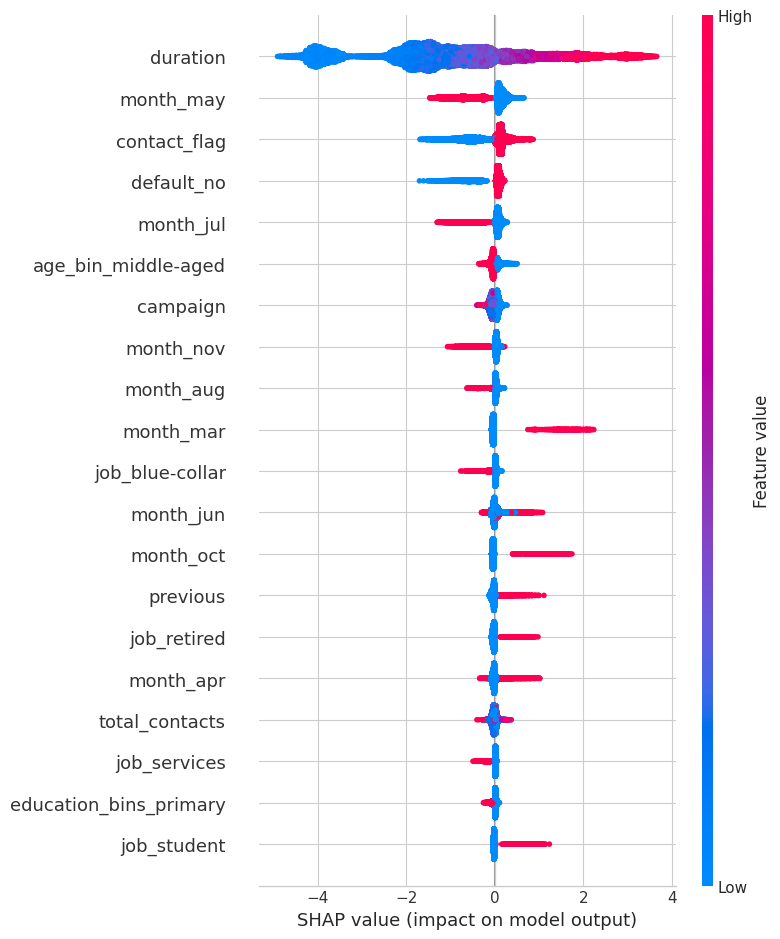

In [204]:
import shap
explainer = shap.TreeExplainer(final_clf)
shap_values = explainer.shap_values(train.to_numpy())
shap.summary_plot(shap_values, train)

Найбільший внесок у передбачення моделі роблять ознаки: duration.

Для duration менші значення знижують ймовірність того, що клієнт укладе депозит, тоді як більші значення підвищують цю ймовірність.

Інші ознаки показують змішані ефекти і відображають різні закономірності, про які йшлося раніше.

Більше контактів із клієнтами в березні підвищує ймовірність успіху.

Сині точки позначають низькі значення, а червоні точки — високі значення.


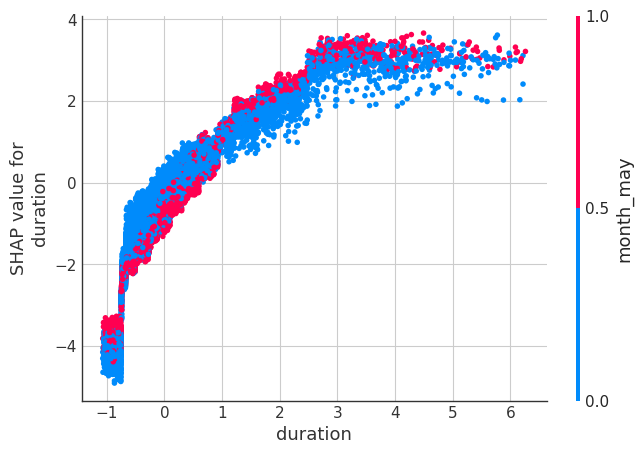

In [205]:
# Visualization of feature dependency
shap.dependence_plot('duration', shap_values, train)

Графік ілюструє нелінійну залежність між duration та month_may. Вплив duration на передбачення не є постійним і змінюється залежно від значення month_may.

При низьких і негативних значеннях duration внесок ознаки у передбачення є негативним (нижче нуля). Починаючи приблизно з duration ≈ 1, вплив значно зростає і стає позитивним: довші контакти підвищують ймовірність укладення депозиту.

Після duration ≈ 3 ефект починає насичуватися, і приріст у передбаченні стає майже незначним. Це свідчить про те, що після певної тривалості контакту будь-яке подальше збільшення часу не має суттєвого впливу на ймовірність успіху.

In [206]:
from IPython.display import display
import shap

# Initialize JS for SHAP visualizations
shap.initjs()

# Select a record to explain
i = 0

# Visualize SHAP values for this record
display(shap.force_plot(
    explainer.expected_value,  # scalar base value
    shap_values[i],            # SHAP values for the i-th instance
    train.iloc[i]              # Feature values for the i-th instance
))

## 9. Аналіз записів

In [207]:
val_pred = final_clf.predict(val.to_numpy())  # Getting predictions
errors = val_targets != val_pred            # Highlighting errors

In [208]:
error_df = val[errors]  # DataFrame with errors
correct_df = val[~errors]  # DataFrame with correct predictions

In [209]:
# Counting the distribution of categorical variables in errors
categorical_cols = ['poutcome_codes']  # Variables to analyze
# Removed 'month_apr' from categorical_cols as it is not suitable for value_counts()
for col in categorical_cols:
    print(f"Distribution of {col} among incorrect predictions:")
    print(error_df[col].value_counts(normalize=True) * 100)
    print("\n")

# Analyzing the mean values of numerical variables in correct and incorrect predictions
numeric_cols = ['duration', 'economic_health_index']
print("Mean values of numerical variables:")
print("Incorrect predictions:\n", error_df[numeric_cols].mean())
print("Correct predictions:\n", correct_df[numeric_cols].mean())

Distribution of poutcome_codes among incorrect predictions:
poutcome_codes
1.00   84.19
0.00   15.49
2.00    0.31
Name: proportion, dtype: float64


Mean values of numerical variables:
Incorrect predictions:
 duration                1.28
economic_health_index   0.00
dtype: float64
Correct predictions:
 duration                -0.12
economic_health_index    0.00
dtype: float64


Модель найчастіше робить помилки, коли poutcome_codes = 1, тобто за невдалого попереднього контакту.
Duration схильна спричиняти більше помилок при довших дзвінках. Можна розглянути варіант бінінгу тривалості (наприклад, на короткі, середні та довгі).
Коли economic_health_index низький, модель також робить більше помилок.
Це може означати, що модель недостатньо враховує важливість економічних умов.


In [210]:
# Check class balance in poutcome_codes
class_distribution = df['poutcome_codes'].value_counts(normalize=True) * 100
print("Class balance in poutcome_codes (%):")
print(class_distribution)

Class balance in poutcome_codes (%):
poutcome_codes
1.00   89.47
0.00   10.52
2.00    0.01
Name: proportion, dtype: float64


Набір даних є незбалансованим, особливо для класу успіху (0.01). Модель, навчена на таких даних, ймовірно, ігноруватиме успіх і в більшості випадків передбачатиме невдачу.
Рішення: балансування даних.

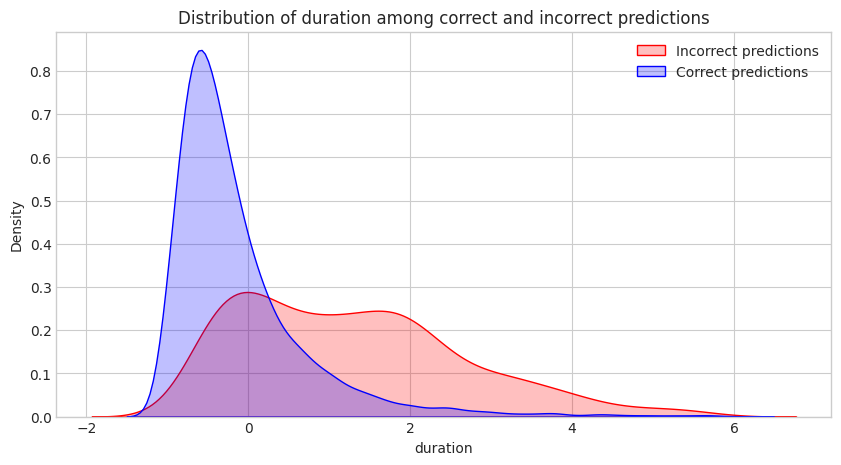

In [211]:
# Visualize the distribution of the "duration" feature among incorrect and correct predictions
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['duration'], label="Incorrect predictions", fill=True, color="red")
sns.kdeplot(correct_df['duration'], label="Correct predictions", fill=True, color="blue")
plt.legend()
plt.title("Distribution of duration among correct and incorrect predictions")
plt.show()

In [212]:
print("Median duration for incorrect predictions:", error_df['duration'].median())
print("Median duration for correct predictions:", correct_df['duration'].median())

Median duration for incorrect predictions: 1.109697833358086
Median duration for correct predictions: -0.36903210251256163


Модель робить більше помилок при довших дзвінках (коли duration більше 1 секунди).
Вона працює краще з коротшими дзвінками, де duration менше 1 секунди (це видно з негативної медіани для правильних передбачень).

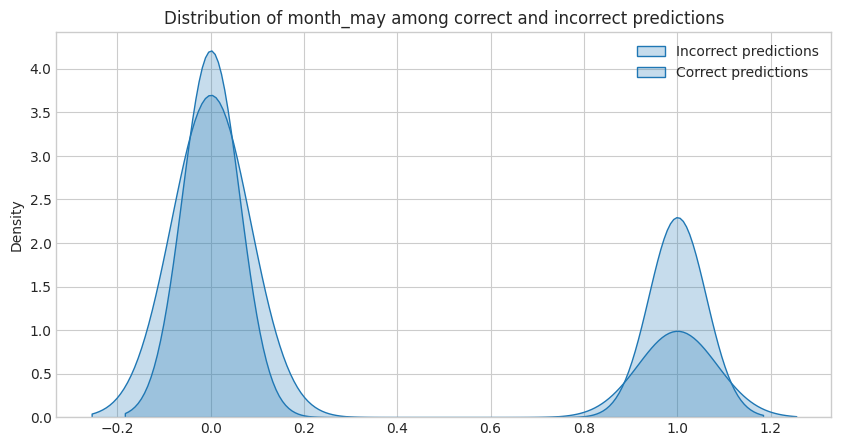

In [214]:
# Visualizing the distribution of the "month_may" feature among incorrect and correct predictions
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['month_may'], label="Incorrect predictions", fill=True, color="red")
sns.kdeplot(correct_df['month_may'], label="Correct predictions", fill=True, color="blue")
plt.legend()
plt.title("Distribution of month_may among correct and incorrect predictions")
plt.show()

In [216]:
print("Median month_may for incorrect predictions:", error_df['month_may'].median())
print("Median month_may for correct predictions:", correct_df['month_may'].median())

Median month_may for incorrect predictions: month_may   0.00
month_may   0.00
dtype: float64
Median month_may for correct predictions: month_may   0.00
month_may   0.00
dtype: float64


In [217]:
probs = final_clf.predict_proba(val.to_numpy())[:, 1]  # Probabilities of class "yes"
error_probs = probs[errors]  # Probabilities for incorrect predictions

print("Average probability of incorrect predictions:", np.mean(error_probs))

Average probability of incorrect predictions: 0.3632937


Модель не дуже впевнена у своїх передбаченнях.
Може знадобитися:
переналаштувати поріг класифікації,
додати нові ознаки,
налаштувати гіперпараметри моделі,
додати регуляризацію для боротьби з перенавчанням.
Більш детальне дослідження помилок допоможе зрозуміти, як їх виправити.

## Тестування на тестовому наборі

In [219]:
best_params = {
    'colsample_bytree': 0.99,
    'gamma': 1.02,
    'learning_rate': 0.1,
    'max_depth': 15,
    'min_child_weight': 6,
    'n_estimators': 200,
    'reg_alpha': 2.4,
    'reg_lambda': 0.19,
    'subsample': 0.93
}


xgb_clf = xgb.XGBClassifier(
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
    **best_params
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc:.3f}")
print(f"AUROC on validation data: {val_auroc:.3f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:17:15] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:17:15] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.950
AUROC on validation data: 0.921


In [220]:
test_pred = xgb_clf.predict_proba(test.to_numpy())[:, 1]
test_auroc = roc_auc_score(test_targets, test_pred)
print(f"AUROC on the test set: {test_auroc}")

AUROC on the test set: 0.9161978532871542


AUROC на тестовому наборі: 0.916 – з невеликим перенавчанням, але модель все ще добре узагальнює. Рекомендується продовжити експерименти з інженерією ознак, гіперпараметрами та регуляризацією для покращення моделі.
Виключення стовпця duration погіршило продуктивність моделі, але його слід видалити у фінальній версії.
